# Airbnb in Boston



[Neighbourhood](#NEIGHBORHOOD)

[Public Transportation](#TRANSPORTATION)

[Space](#SPACE)

[Price](#PRICE)

[Other Details](#OTHER_DETAILS)



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import seaborn as sns
import pickle
%matplotlib inline
pd.set_option("max_columns", None)

### About the Datafarame


In [129]:
# load the data, this is the longer version with 106 columns
# listings_bos = pd.read_csv('../input/b_listings/extra/listings_201907_long.csv')
# listings_cam = pd.read_csv('../input/c_listings/extra/listings_201907_long.csv')
# listings = pd.concat([listings_bos,listings_cam],ignore_index=True)

listings = pd.read_csv('../input/b_listings/extra/listings_201907_long.csv')
listings.shape

(6264, 106)

In [49]:
# listings_bos.shape[0]

6264

In [51]:
# listings_bos.id.describe()

count    6.264000e+03
mean     2.084897e+07
std      9.885939e+06
min      3.781000e+03
25%      1.378730e+07
50%      2.172642e+07
75%      2.903044e+07
max      3.669705e+07
Name: id, dtype: float64

In [96]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1377 entries, 0 to 1376
Columns: 106 entries, id to reviews_per_month
dtypes: float64(22), int64(23), object(61)
memory usage: 1.1+ MB


In [97]:
listings.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.377000e+03,1.377000e+03,0.0,0.0,0.0,1.377000e+03,0.0,1368.000000,1368.000000,0.0,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,8.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1162.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,0.0,1377.000000,1377.000000,1377.000000,1377.000000,1179.000000
mean,1.995528e+07,2.019072e+13,NaN,NaN,NaN,6.933603e+07,NaN,41.637427,41.637427,NaN,42.372002,-71.107792,3.084967,1.274873,1.355120,1.732752,458.125000,1.593319,13.187364,726.214234,12.087146,14.806100,725.690632,726.214234,14.016122,726.194336,6.681917,17.639797,29.943355,135.389978,46.750182,16.792302,94.456110,9.663221,9.435831,9.808786,9.780362,9.835487,9.349699,NaN,5.553377,2.606391,2.931736,0.015251,2.154979
std,1.114217e+07,6.760268e-01,NaN,NaN,NaN,7.870097e+07,NaN,144.272167,144.272167,NaN,0.009219,0.017614,1.956849,0.520447,0.804848,1.094268,296.418352,1.256454,33.363982,580.695044,31.591202,36.110248,581.183156,580.695044,34.301526,580.707712,8.486509,18.313749,29.382002,128.425074,71.780249,23.586626,7.402438,0.741224,0.909466,0.614165,0.600999,0.496173,0.830466,NaN,6.764107,4.880004,5.158222,0.122592,2.156769
min,8.521000e+03,2.019072e+13,NaN,NaN,NaN,3.538400e+04,NaN,0.000000,0.000000,NaN,42.352040,-71.159640,1.000000,1.000000,0.000000,0.000000,105.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.020000
25%,1.035588e+07,2.019072e+13,NaN,NaN,NaN,9.928124e+06,NaN,1.000000,1.000000,NaN,42.365350,-71.117110,2.000000,1.000000,1.000000,1.000000,176.250000,1.000000,1.000000,60.000000,1.000000,1.000000,60.000000,60.000000,1.000000,60.000000,0.000000,0.000000,1.000000,11.000000,2.000000,1.000000,92.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.490000
50%,2.075650e+07,2.019072e+13,NaN,NaN,NaN,3.353454e+07,NaN,3.000000,3.000000,NaN,42.370260,-71.106350,2.000000,1.000000,1.000000,1.000000,502.500000,1.000000,2.000000,1125.000000,2.000000,3.000000,1125.000000,1125.000000,2.000000,1125.000000,3.000000,11.000000,21.000000,92.000000,17.000000,6.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,3.000000,1.000000,1.000000,0.000000,1.270000
75%,3.038990e+07,2.019072e+13,NaN,NaN,NaN,1.021346e+08,NaN,11.000000,11.000000,NaN,42.375880,-71.095980,4.000000,1.500000,2.000000,2.000000,662.500000,2.000000,7.000000,1125.000000,7.000000,14.000000,1125.000000,1125.000000,12.000000,1125.000000,10.000000,31.000000,54.000000,263.000000,61.000000,24.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,7.000000,2.000000,3.000000,0.000000,3.305000
max,3.693575e+07,2.019072e+13,NaN,NaN,NaN,2.757754e+08,NaN,781.000000,781.000000,NaN,42.401410,-71.070290,14.000000,4.500000,6.000000,8.000000,900.000000,

In [129]:
listings.tail(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
7638,36884086,https://www.airbnb.com/rooms/36884086,20190720185741,2019-07-20,Kirkland Village Graduate Student Housing,This large bedroom is located in a bright and ...,NaN,This large bedroom is located in a bright and ...,none,"This house is close to Harvard, MIT, Lesley an...",NaN,"Steps to Harvard, red line, shops, restaurants...",NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/b651a26e-8...,NaN,92891905,https://www.airbnb.com/users/show/92891905,Charles,2016-08-31,NaN,NaN,within an hour,100%,NaN,f,https://a0.muscache.com/im/pictures/user/99f4e...,https://a0.muscache.com/im/pictures/user/99f4e...,Somerville,5.0,5.0,['phone'],t,f,"Somerville, MA, United States",Somerville,Mid-Cambridge,NaN,Somerville,MA,02143,Boston,"Somerville, MA",US,United States,42.37712,-71.10361,t,Apartment,Private room,1,1.5,1.0,1,Real Bed,"{Wifi,Kitchen,Heating,Washer,Dryer,""Smoke dete...",NaN,$50.00,NaN,NaN,NaN,NaN,1,$0.00,270,360,270,270,360,360,270.0,360.0,today,t,18,31,31,81,2019-07-20,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,"{""Massachusetts State"","" Massachusetts State""}",t,f,flexible,f,f,3,1,2,0,NaN
7639,36888997,https://www.airbnb.com/rooms/36888997,20190720185741,2019-07-20,Charming apartment in Beacon Hill,You'll fall in love with this charming apartme...,NaN,You'll fall in love with this charming apartme...,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/8bb37de8-4...,NaN,214153218,https://www.airbnb.com/users/show/214153218,Anna,2018-09-07,"Boston, Massachusetts, United States",Young professional who loves travelling,within an hour,100%,NaN,f,https://a0.muscache.com/im/pictures/user/6b4eb...,https://a0.muscache.com/im/pictures/user/6b4eb...,Beacon Hill,0.0,0.0,"['email', 'phone', 'offline_government_id', 's...",t,f,"Boston, MA, United States",Beacon Hill,East Cambridge,NaN,Boston,MA,02114,Boston,"Boston, MA",US,United States,42.35996,-71.07029,t,Apartment,Private room,1,1.0,1.0,1,Real Bed,"{Kitchen,Washer,Dryer,Essentials,Shampoo,Hange...",NaN,$100.00,NaN,NaN,NaN,NaN,1,$0.00,2,1125,2,2,1125,1125,2.0,1125.0,yesterday,t,4,4,4,4,2019-07-20,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,"{""Massachusetts State"","" Massachusetts State""}",t,f,flexible,f,f,1,0,1,0,NaN
7640,36935753,https://www.airb

# PRICE

In [182]:
# clean price data, it is string(ex: '$100') rather than float
clean_price = lambda x: np.nan if pd.isna(x) else float(x.split('$')[1].replace(',',''))
listings.price = listings.price.apply(clean_price)
listings.price.describe()

count     6264.000000
mean       199.063697
std        347.696661
min          0.000000
25%         80.000000
50%        149.000000
75%        235.000000
max      10000.000000
Name: price, dtype: float64

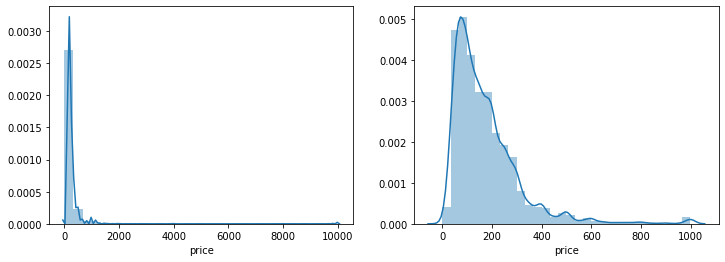

In [111]:
# Pricing distribution is realy skewed 
fig, axes = plt.subplots(1,2, figsize = (12,4))
sns.distplot(listings[('price')],bins=30, ax=axes[0])
sns.distplot(listings[listings.price<1000][('price')],bins=30, ax=axes[1]);

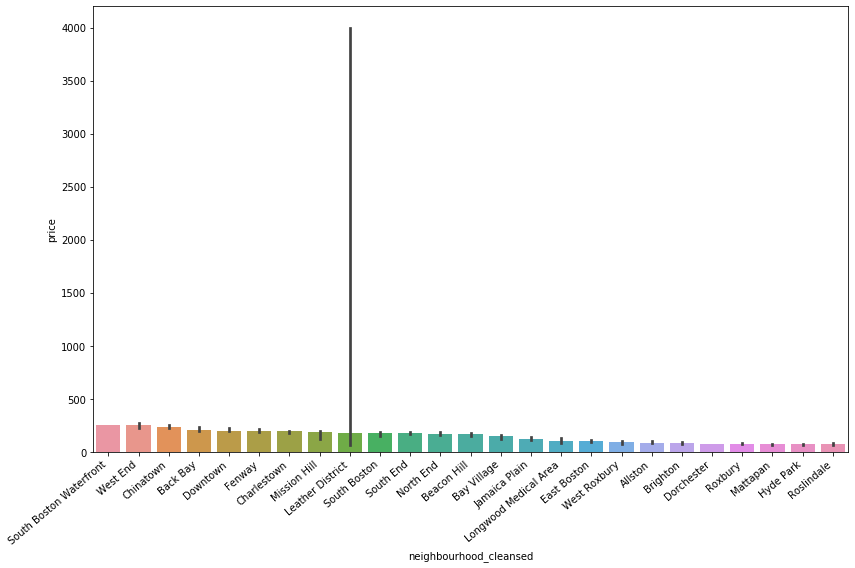

In [185]:
# let's take a look at the median price per neighbourhood
plt.figure(figsize=(12,8))
ax = sns.barplot(x='neighbourhood_cleansed',y ='price',data=listings,estimator=np.median,
                order=listings.groupby('neighbourhood_cleansed').median().price.sort_values(ascending=False).index);
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [113]:
# leather district has very few listings with a big outlier 
listings[listings.neighbourhood_cleansed=='Leather District'].price

bos  890      179.0
     1531    3999.0
     1953      65.0
     5862     550.0
     6084     170.0
Name: price, dtype: float64

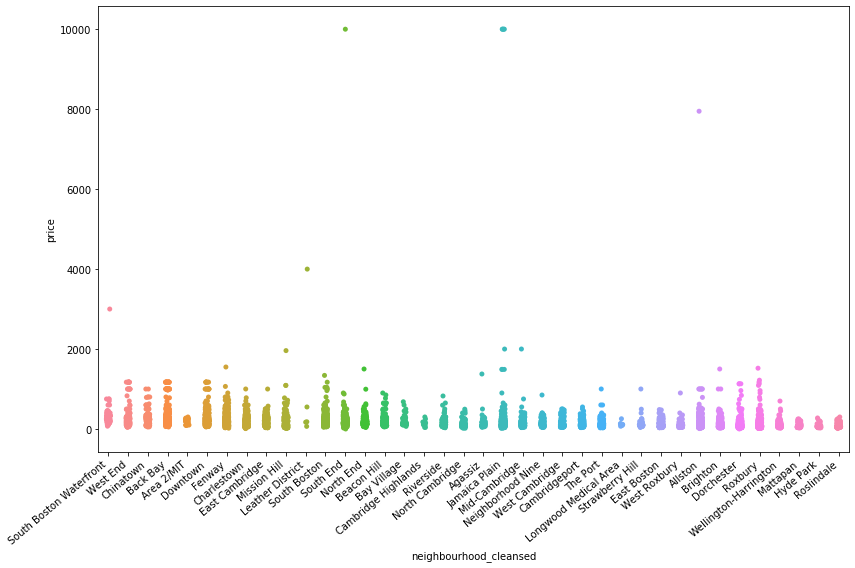

In [114]:
# infact we can see many neighbourhood have outliers 
plt.figure(figsize=(12,8))
ax = sns.stripplot(x='neighbourhood_cleansed',y ='price',data=listings,
                order=listings.groupby('neighbourhood_cleansed').median().price.sort_values(ascending=False).index);
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

//anaconda3/lib/python3.7/site-packages/mpl_toolkits/mplot3d/axes3d.py:1773: RuntimeWarning:

divide by zero encountered in true_divide



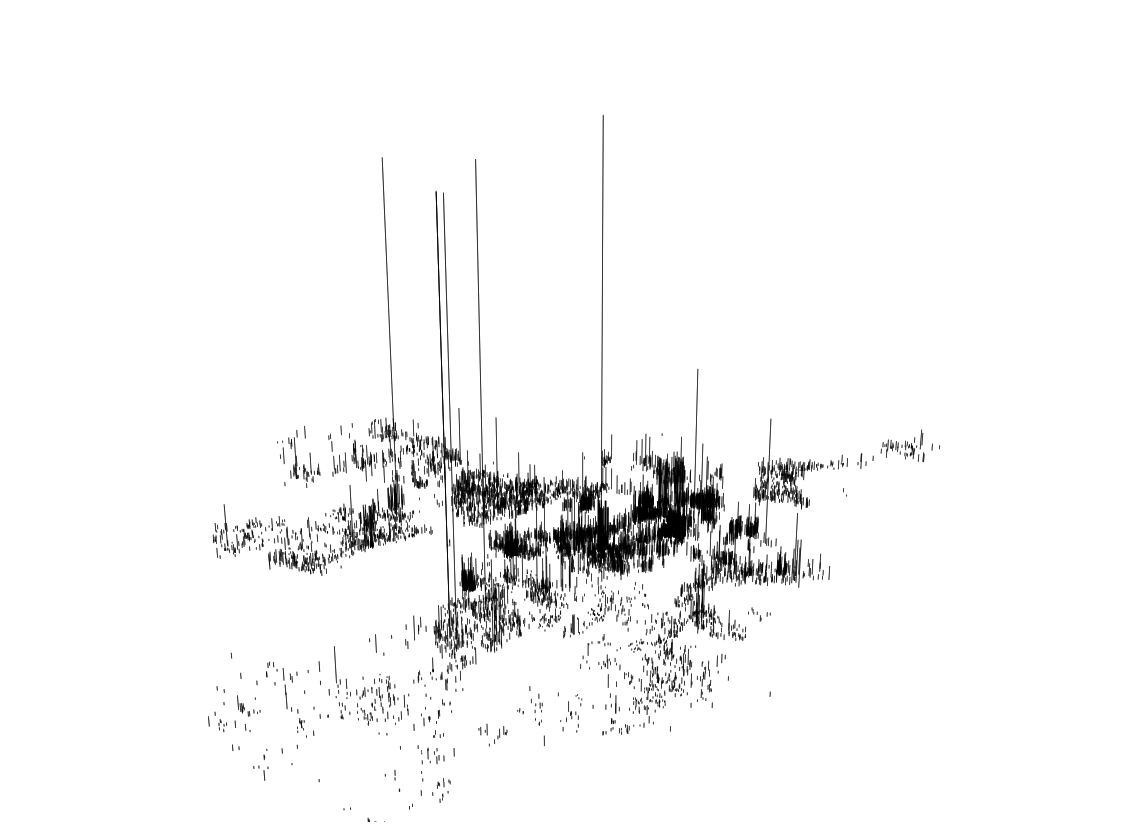

In [115]:
# here is a 3D plot if you want to see where are they
fig = plt.figure(figsize = [20, 15])
ax = fig.add_subplot(111, projection='3d')

ax.set_axis_off()
ax.azim = 270
ax.elev = 45
ax.dist = 7

ax.bar3d(listings.longitude, listings.latitude, np.zeros(len(listings)), 
         0.0002, 0.0002, listings.price,color='black', alpha=0.6)

plt.show()

In [116]:
# 0.85% of total listings have absurdly high price over $1000 all the way to $10,000 per ninght
# 6% of total listings have high price over $400 per ninght
listings[listings.price>1000].shape[0]/listings.shape[0], listings[listings.price>400].shape[0]/listings.shape[0]

(0.008506739955503207, 0.059547179688522446)

In [132]:
# upon manual inspections some are temporary/fake listings and some are seasonal pricing spikes 
# How do we deal with these outliers...?
listings.iloc[listings[listings.price>1000]['price'].sort_values(ascending=False).index][['listing_url','price']]

,listing_url,price
6146,https://www.airbnb.com/rooms/36112693,10000.0
6148,https://www.airbnb.com/rooms/36113049,10000.0
5876,https://www.airbnb.com/rooms/35156022,10000.0
6147,https://www.airbnb.com/rooms/36112870,10000.0
6150,https://www.airbnb.com/rooms/36113379,10000.0
5748,https://www.airbnb.com/rooms/34577654,7948.0
1531,https://www.airbnb.com/rooms/13657486,3999.0
1364,https://www.airbnb.com/rooms/12679021,3000.0
6603,https://www.airbnb.com/rooms/10141471,2000.0
6232,https://www.airbnb.com/rooms/36562787,1999.0


# More! Data!

In [138]:
# So, if we want a more general report that doesn't just reflect the current seasonality,
# we would need more data!

# import tools
import glob
from functools import reduce

# a funtion to process all the csv files
def process_files(path):
    
    """
    Read all csv files from path and produce two dataframes.
    
    price_all_v: a vertically appended dataframe with selected columns 
         such as ['id','latitude','longitude','neighbourhood','price'] 
         
    price_filtered_v: a dataframe filters out listings which didn't last for all the months in price_all_v
    
    """
    
    all_files = glob.glob(path + "/*.csv")
    all_files.sort()

    df_list = []

    for file in all_files:
        df = pd.read_csv(file, usecols=['id','price'])
        df.columns = ['id','price'+file[-11:-4]]
        df_list.append(df)

    #herizontally append price, for filtering listings which didn't last for all the months   
    price_all_h = reduce(lambda left,right: pd.merge(left,right,on='id', how = 'outer'), df_list)
    # remove listings which didn't last for all the months, may not be useful
    price_filtered_h = price_all_h.dropna()

    # vertically append price for visulization 
    df_list = []

    for file in all_files:
        df = pd.read_csv(file, usecols=['id','latitude','longitude','neighbourhood','price'])
        df['date_time'] = pd.to_datetime(file[-10:-6]+'-'+file[-6:-4])
        df['month'] = file[-10:-4]
        df_list.append(df)

    price_all_v = reduce(lambda x,y: pd.DataFrame.append(x,y,ignore_index=True), df_list)
    price_filtered_v = price_all_v[price_all_v.id.isin(price_filtered_h.id)]
    
    return price_all_v, price_filtered_v


In [139]:
# from the source the data was divided into two streams; one for city of Boston the other for city of Cambridge
# for this project both streams of data are combined into one sigle file for reporting on the entir Boston Area
# data for the city of Cambridge spans from 2018-11 to 2019-08; we have less data from Cambridge than from Boston

price_bos_12m, price_bos_filtered_12m = process_files('../input/b_listings')
price_cam_10m, price_cam_filtered_10m = process_files('../input/c_listings')

# price_all_9m = pd.concat([price_all_b,price_all_c],ignore_index=True)
# price_filtered_9m = pd.concat([price_filtered_b,price_all_c], ignore_index=True)

In [208]:
# # pickle processed dataframes
# with open ('../input/df_price_cam_filtered_10m.pickle','wb') as fp:
#     pickle.dump(price_cam_filtered_10m,fp,pickle.HIGHEST_PROTOCOL)

# # with open('../input/df_t_stations.pickle', 'rb') as f:
# #     df_t_stations = pickle.load(f)

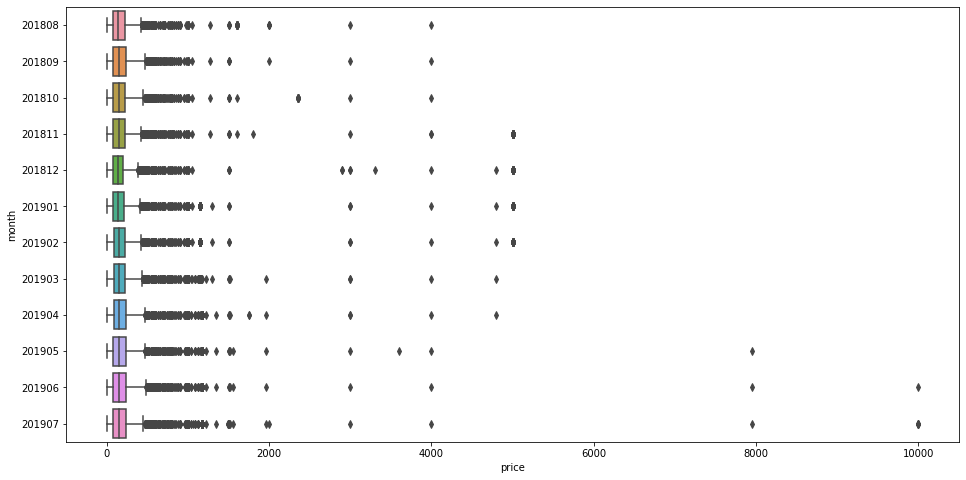

In [210]:
plt.figure(figsize=(16,8))
sns.boxplot(y='month', x='price', data=price_bos_12m,orient='h');

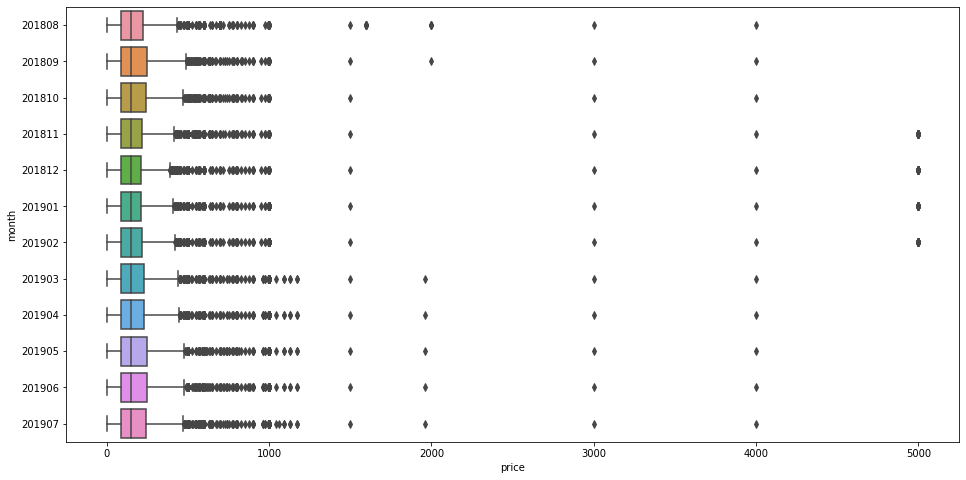

In [211]:
plt.figure(figsize=(16,8))
sns.boxplot(y='month', x='price', data=price_bos_filtered_12m,orient='h');

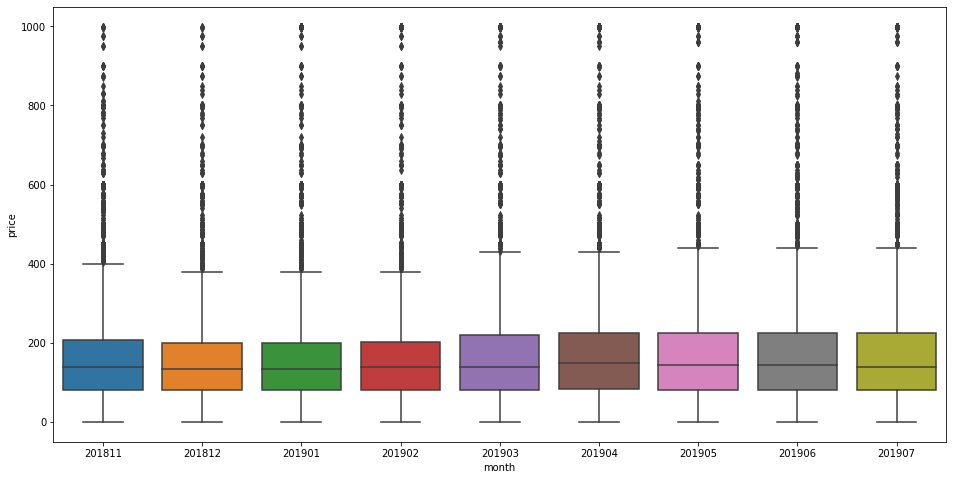

In [194]:
plt.figure(figsize=(16,8))
sns.boxplot(x='month', y='price', data=price_all_v[price_all_v.price<1000],orient='v');

In [213]:
pricing_stats_all = price_bos_12m.groupby('month').price.describe().reset_index()
pricing_stats_all

,month,count,mean,std,min,25%,50%,75%,max
0,201808,6036.0,184.089629,184.401721,0.0,80.0,140.0,219.00,3999.0
1,201809,5957.0,181.925802,154.076974,0.0,80.0,149.0,239.00,3999.0
2,201810,6014.0,184.020619,177.108393,0.0,80.0,149.0,230.00,3999.0
3,201811,6296.0,196.547332,357.437717,0.0,80.0,147.0,219.00,5000.0
4,201812,6217.0,193.077208,365.352224,0.0,80.0,143.0,200.00,5000.0
5,201901,6247.0,202.083400,371.325512,0.0,82.0,144.0,212.00,5000.0
6,201902,6155.0,206.795126,375.423899,0.0,83.0,150.0,220.00,5000.0
7,201903,6221.0,190.110432,194.715351,0.0,84.0,150.0,228.00,4800.0
8,201904,6202.0,195.781683,201.970913,0.0,85.0,150.0,238.75,4800.0
9,201905,6241.0,194.367089,217.007754,0.0,80.0,150.0,237.00,7948.0


In [212]:
pricing_stats_filtered = price_bos_filtered_12m.groupby('month').price.describe().reset_index()
pricing_stats_filtered

,month,count,mean,std,min,25%,50%,75%,max
0,201808,3802.0,191.713046,190.781513,0.0,85.00,150.0,225.00,3999.0
1,201809,3802.0,187.306681,161.779595,0.0,88.00,150.0,247.75,3999.0
2,201810,3802.0,186.260915,158.914344,0.0,88.00,150.0,242.75,3999.0
3,201811,3802.0,207.203314,403.948891,0.0,88.00,150.0,220.00,5000.0
4,201812,3802.0,201.690952,402.587780,0.0,88.00,149.0,208.75,5000.0
5,201901,3802.0,206.077065,408.029851,0.0,85.00,149.0,213.00,5000.0
6,201902,3802.0,209.286954,408.067146,0.0,85.00,150.0,220.00,5000.0
7,201903,3802.0,187.244608,174.513478,0.0,86.00,150.0,229.00,3999.0
8,201904,3802.0,188.665176,174.901335,0.0,88.00,150.0,231.00,3999.0
9,201905,3802.0,191.912415,178.340773,0.0,88.00,150.0,245.00,3999.0


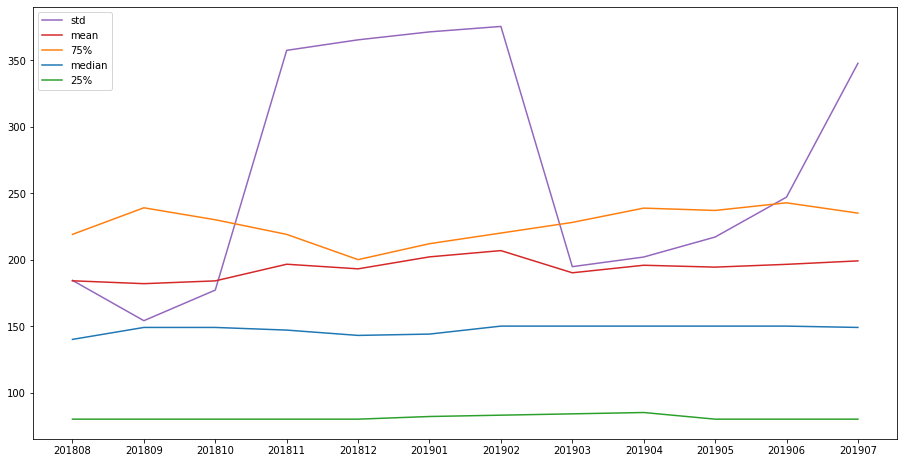

In [214]:
df = pricing_stats_all

fig = plt.figure(figsize=(12,6))
axes = fig.add_axes([0,0,1,1])
axes.plot(df.month, df['std'], label='std',color='tab:purple')
axes.plot(df.month, df['mean'], label='mean',color='tab:red')
axes.plot(df.month, df['75%'], label='75%',color='tab:orange')
axes.plot(df.month, df['50%'], label='median',color='tab:blue')
axes.plot(df.month, df['25%'], label='25%',color='tab:green')
axes.legend();

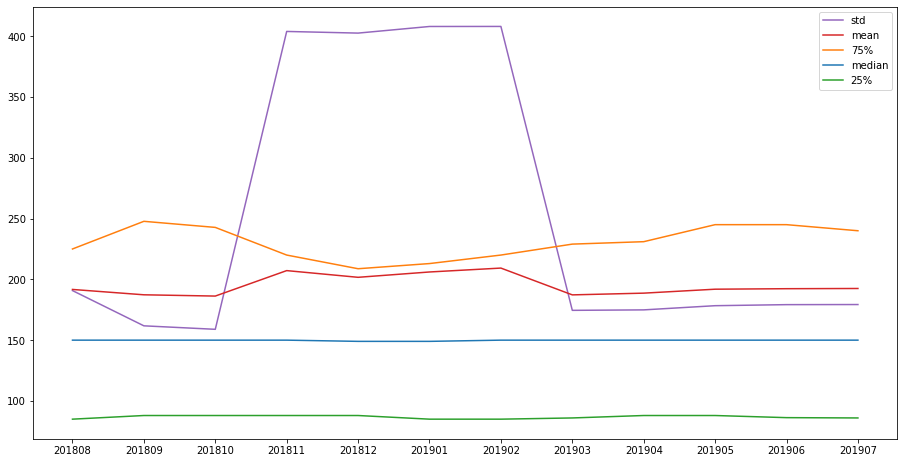

In [215]:
df = pricing_stats_filtered

fig = plt.figure(figsize=(12,6))
axes = fig.add_axes([0,0,1,1])
axes.plot(df.month, df['std'], label='std',color='tab:purple')
axes.plot(df.month, df['mean'], label='mean',color='tab:red')
axes.plot(df.month, df['75%'], label='75%',color='tab:orange')
axes.plot(df.month, df['50%'], label='median',color='tab:blue')
axes.plot(df.month, df['25%'], label='25%',color='tab:green')
axes.legend();

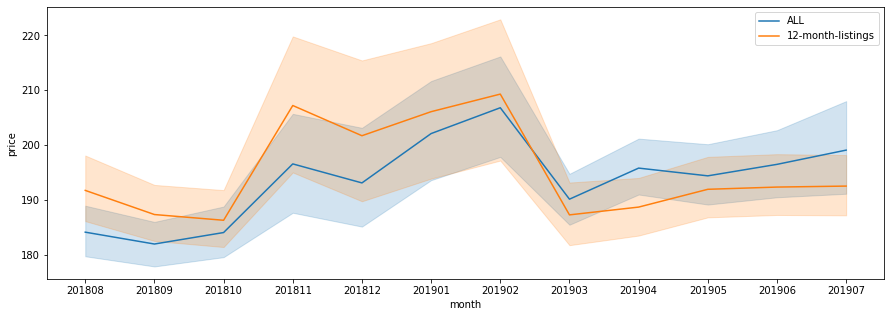

In [22]:
# listings price by month
plt.figure(figsize=(15,5))
sns.lineplot(x='month',y = 'price',data=price_all_v,label='ALL')
sns.lineplot(x='month',y = 'price',data=price_filtered_v,label='12-month-listings');

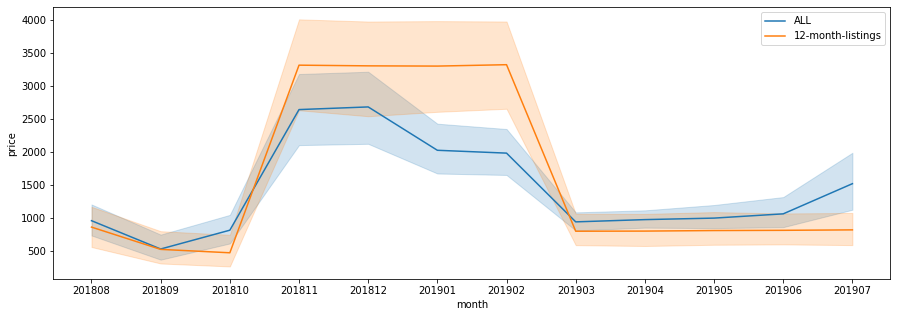

In [23]:
# price of listing pirce > 1000 by month 
ids_1000 = price_all_v[price_all_v.price>1000].id.unique()
tier_1000_all = price_all_v[price_all_v.id.isin(ids_1000)].groupby(['id','month']).price.median().reset_index()
tier_1000_12 = price_filtered_v[price_filtered_v.id.isin(ids_1000)].groupby(['id','month']).price.median().reset_index()

plt.figure(figsize=(15,5))
sns.lineplot(x='month',y = 'price',data=tier_1000_all,label='ALL')
sns.lineplot(x='month',y = 'price',data=tier_1000_12,label='12-month-listings')

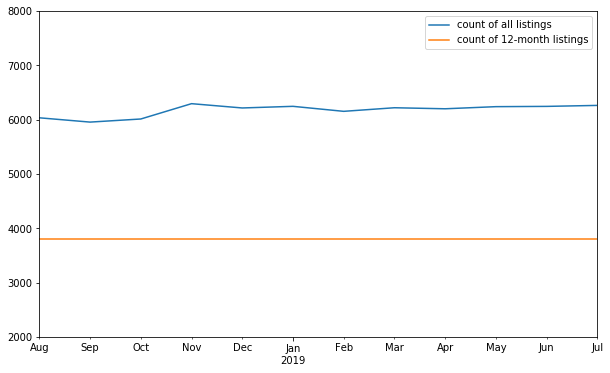

In [24]:
# listings count by month
price_all_v['date_time'].value_counts().sort_index().plot.line(figsize=(10,6),label='count of all listings')
price_filtered_v['date_time'].value_counts().sort_index().plot.line(label='count of 12-month listings')
plt.yticks(np.arange(2000, 9000, 1000))
plt.legend();

In [25]:

# p<=100
ids_100 = price_all_v[price_all_v.price<=100].id.unique()

# 100<p<=150
ids_100_150 = price_all_v[(price_all_v.price>100)&(price_all_v.price<=150)].id.unique()

# 150<p<=250
ids_150_250 = price_all_v[(price_all_v.price>150)&(price_all_v.price<=250)].id.unique()

# 250<p<=400
ids_250_400 = price_all_v[(price_all_v.price>250)&(price_all_v.price<=400)].id.unique()

# 400<p<=1000
ids_400_1000 = price_all_v[(price_all_v.price>400)&(price_all_v.price<=1000)].id.unique()

# 1000<p<=2000
ids_1000_2000 = price_all_v[(price_all_v.price>1000)&(price_all_v.price<=2000)].id.unique()

# 2000<p<=3000
ids_2000_3000 = price_all_v[(price_all_v.price>2000)&(price_all_v.price<=3000)].id.unique()

# 3000<p<=4000
ids_3000_4000 = price_all_v[(price_all_v.price>3000)&(price_all_v.price<=4000)].id.unique()

# 4000<p<=5000
ids_4000_5000 = price_all_v[(price_all_v.price>4000)&(price_all_v.price<=5000)].id.unique()

# 5000<p
ids_5000 = price_all_v[price_all_v.price>5000].id.unique()

In [26]:
ll =[ids_100,ids_100_150,ids_150_250,ids_250_400,ids_400_1000,
     ids_1000_2000,ids_2000_3000,ids_3000_4000,ids_4000_5000,ids_5000]

ln =['p<=100','100<p<=150','150<p<=250', '250<p<=400','400<p<=1000',
    '1000<p<=2000','2000<p<=3000','3000<p<=4000','4000<p<=5000','5000<p']

tiers=[]
for x in ll:
    tier = price_all_v[price_all_v.id.isin(x)].groupby(['id','month']).price.median().reset_index()
    tiers.append(tier)

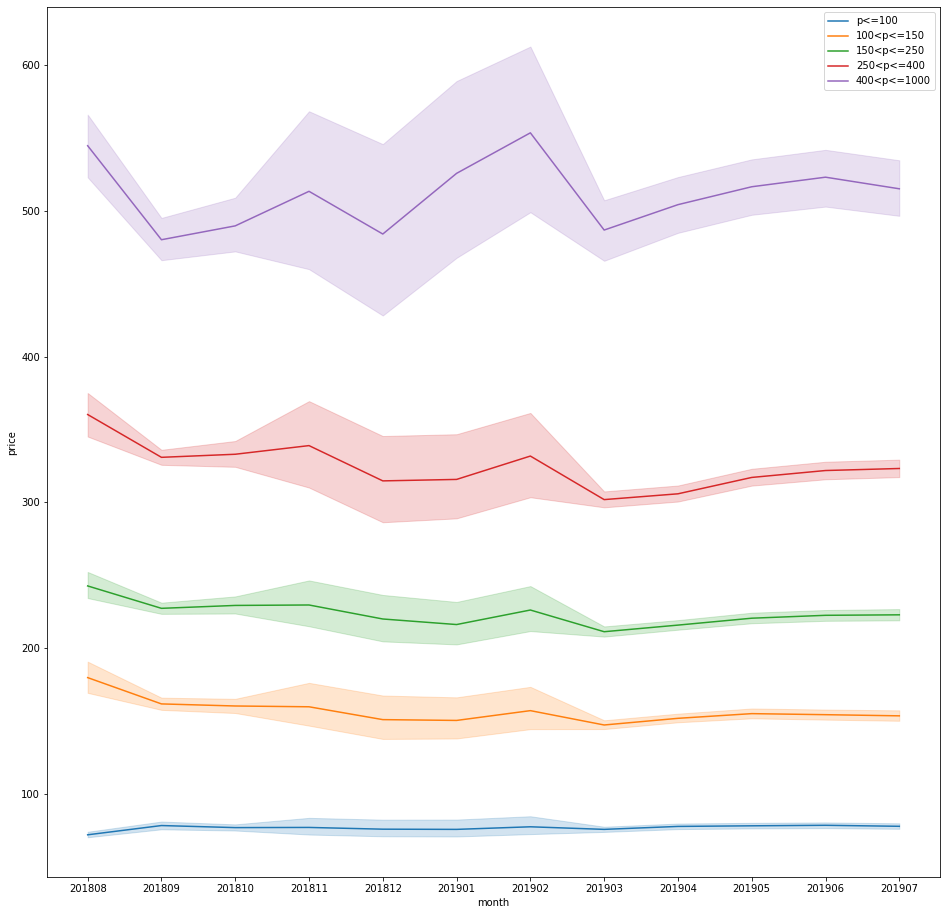

In [27]:
plt.figure(figsize=(16,16))

i=0
for t in tiers[i:5]:
    sns.lineplot(x='month',y = 'price',data=t,label=ln[i])
    i+=1

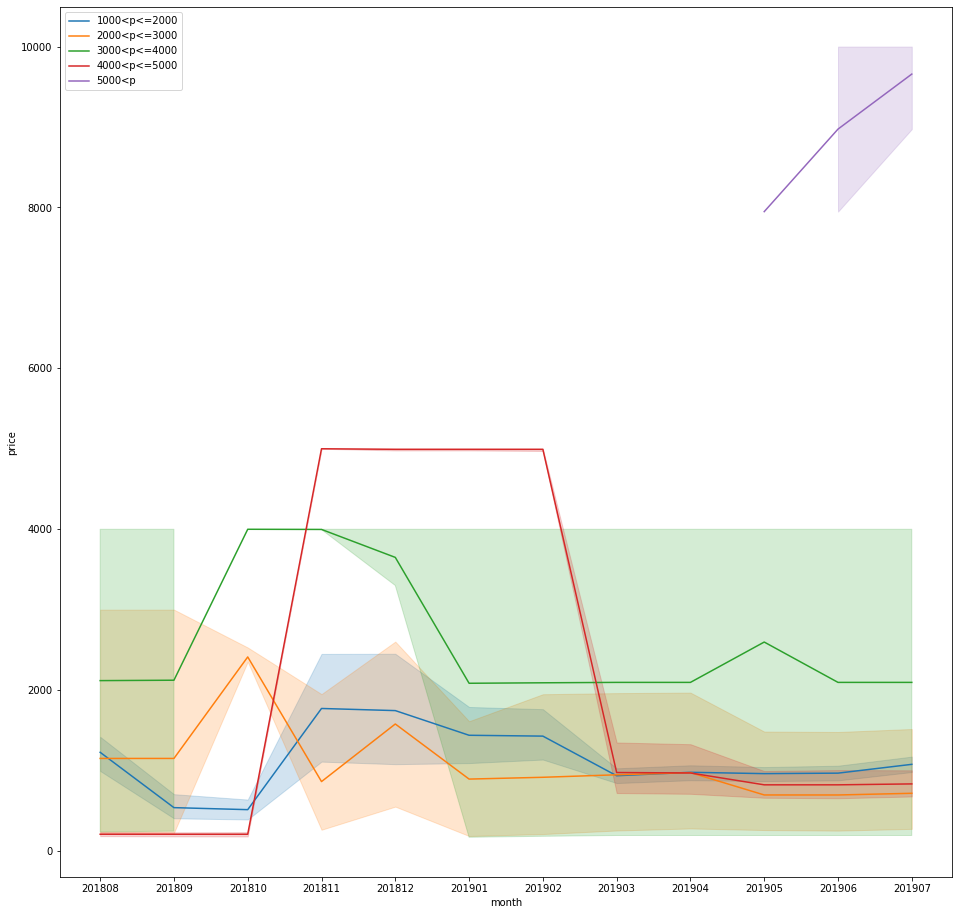

In [28]:
plt.figure(figsize=(16,16))

i=5
for t in tiers[i:]:
    sns.lineplot(x='month',y = 'price',data=t,label=ln[i])
    i+=1

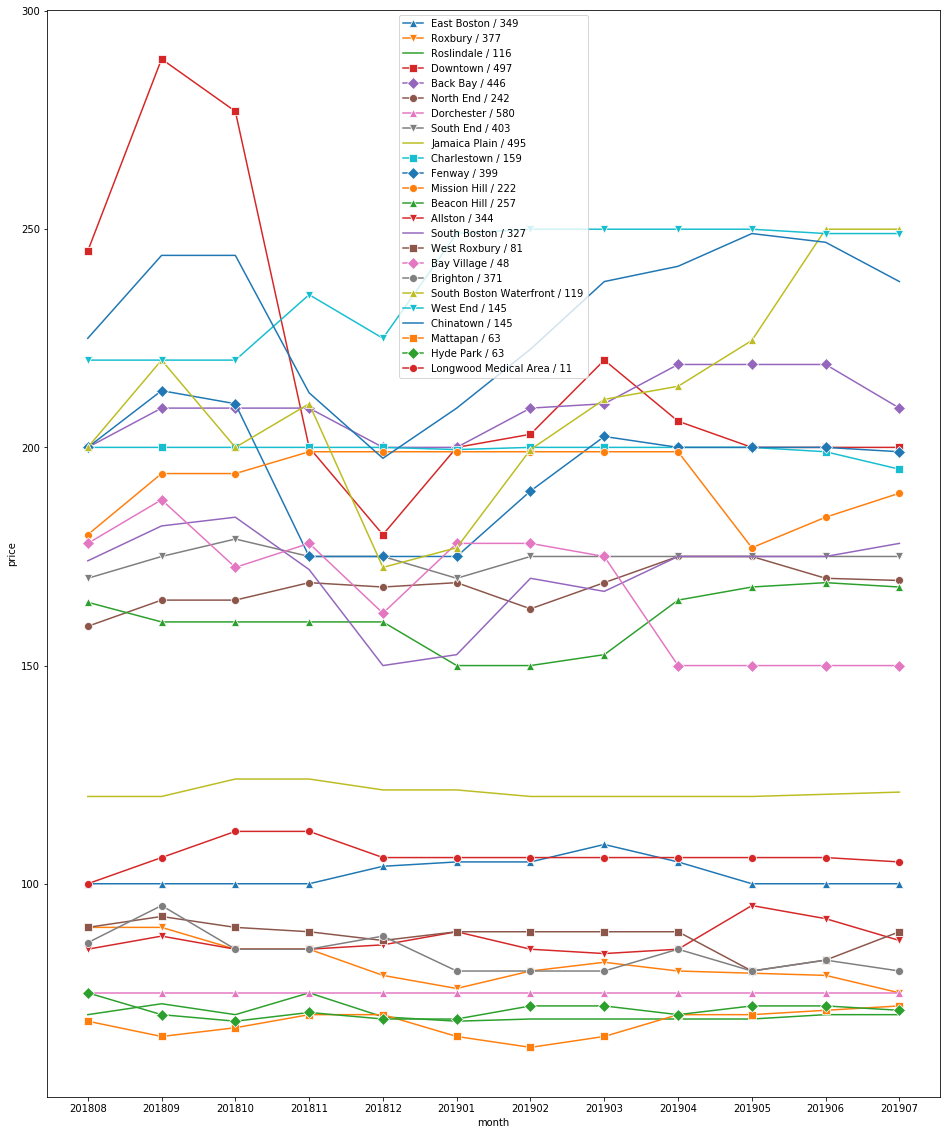

In [29]:
# neighbourhood pricing median
# try plotly??
plt.figure(figsize=(16,20))
markers=[
    '^','v','','s','D','o',
    '^','v','','s','D','o',
    '^','v','','s','D','o',
    '^','v','','s','D','o',
    '^','v','','s','D','o',]
         

i=0
for nb in listings.neighbourhood_cleansed.unique()[:-1]:
    ids = listings[listings.neighbourhood_cleansed==nb].id.unique()
    nb_df = price_all_v[price_all_v.id.isin(ids)].groupby(['month']).price.median().reset_index()
    nb_df['neighbourhood_cleansed'] = nb
    sns.lineplot(x='month',y = 'price',data=nb_df,label=nb+' / '+str(len(ids)),marker=markers[i],markersize=8)
    i+=1

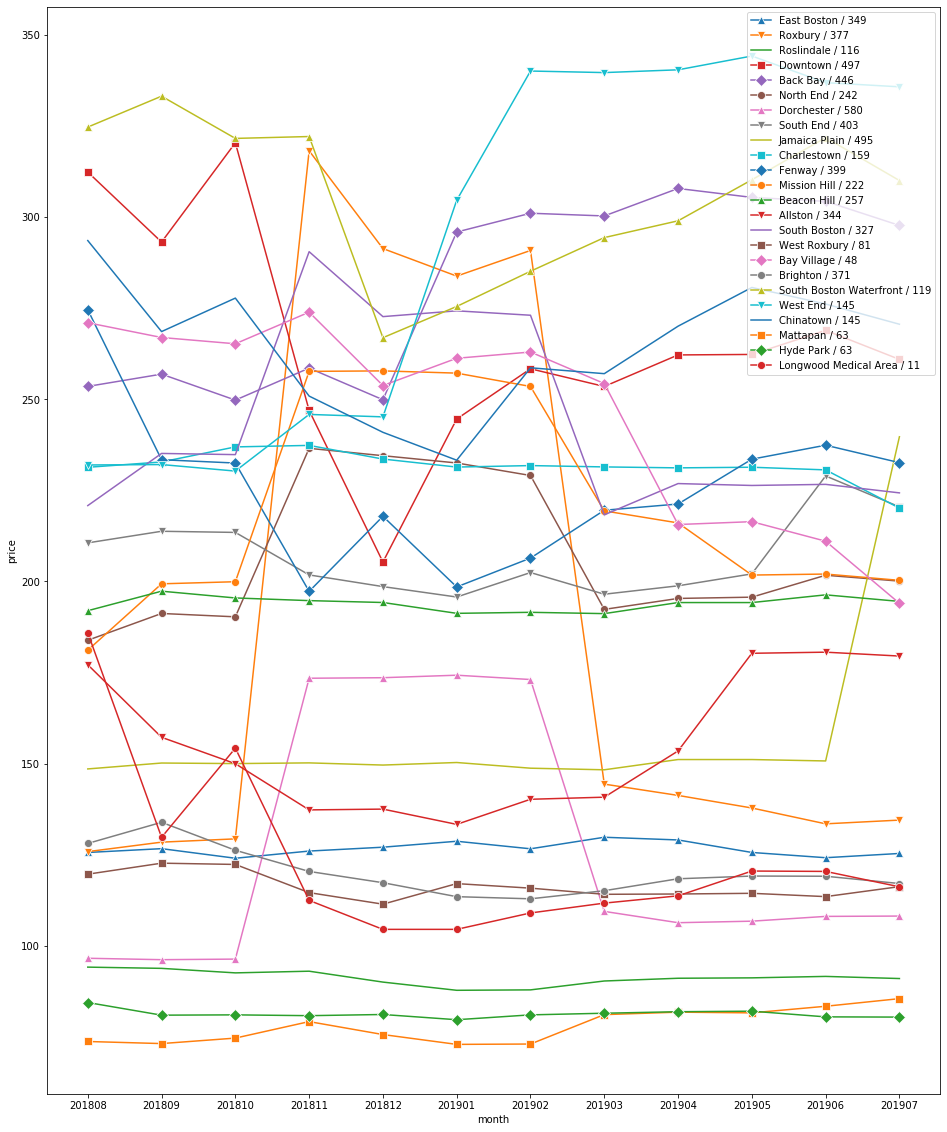

In [30]:
# neighbourhood pricing mean
# try plotly??
plt.figure(figsize=(16,20))
markers=[
    '^','v','','s','D','o',
    '^','v','','s','D','o',
    '^','v','','s','D','o',
    '^','v','','s','D','o',
    '^','v','','s','D','o',]
         

i=0
for nb in listings.neighbourhood_cleansed.unique()[:-1]:
    ids = listings[listings.neighbourhood_cleansed==nb].id.unique()
    nb_df = price_all_v[price_all_v.id.isin(ids)].groupby(['month']).price.mean().reset_index()
    nb_df['neighbourhood_cleansed'] = nb
    sns.lineplot(x='month',y = 'price',data=nb_df,label=nb+' / '+str(len(ids)),marker=markers[i],markersize=8)
    i+=1

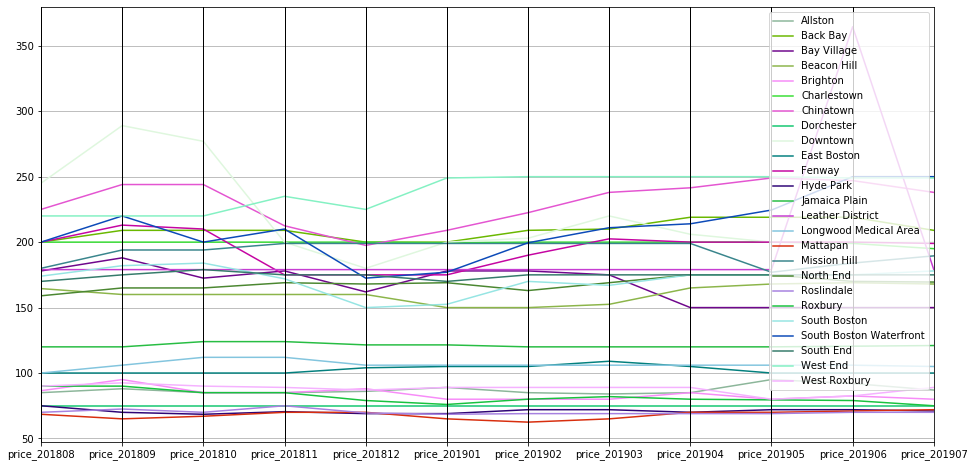

In [31]:
from pandas.plotting import parallel_coordinates

df_id_nb = listings.groupby(['id','neighbourhood_cleansed']).price.mean().reset_index().drop('price', axis=1)
df_pc = price_all_h.merge(df_id_nb,on='id')
df_pc_median = df_pc.drop('id',axis=1).groupby('neighbourhood_cleansed').median().reset_index()
df_pc_mean = df_pc.drop('id',axis=1).groupby('neighbourhood_cleansed').mean().reset_index()

plt.figure(figsize=(16,8))
parallel_coordinates(df_pc_median, 'neighbourhood_cleansed');

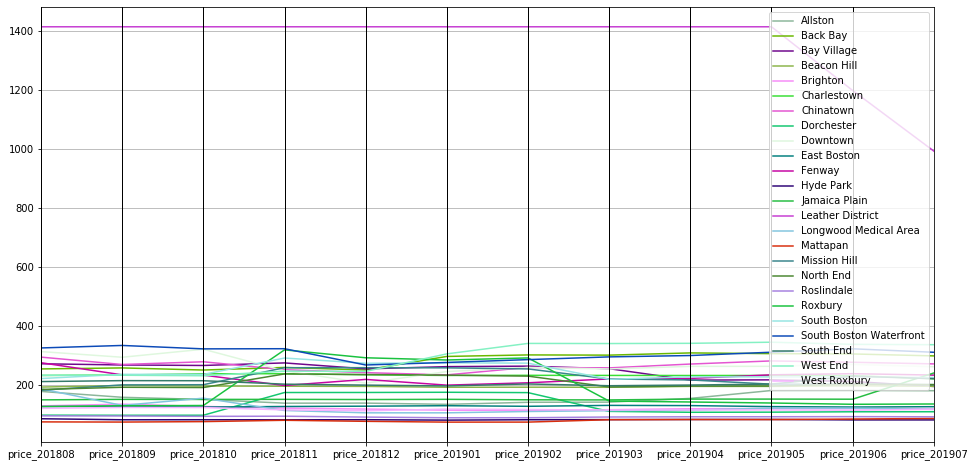

In [32]:
plt.figure(figsize=(16,8))
parallel_coordinates(df_pc_mean, 'neighbourhood_cleansed');

In [33]:
df_pc_mean

,neighbourhood_cleansed,price_201808,price_201809,price_201810,price_201811,price_201812,price_201901,price_201902,price_201903,price_201904,price_201905,price_201906,price_201907
0,Allston,177.105769,157.198157,149.954128,137.278539,137.493450,133.304721,140.193277,140.767932,153.448669,180.247458,180.553055,179.488372
1,Back Bay,253.471154,256.839009,249.711712,258.495652,249.815562,295.826446,300.983827,300.237467,307.779221,305.329238,304.252404,297.639013
2,Bay Village,270.941176,266.888889,265.166667,273.842105,253.714286,261.190476,262.904762,254.260870,215.575758,216.361111,211.000000,193.958333
3,Beacon Hill,191.930108,197.284211,195.427807,194.697436,194.181818,191.206897,191.488263,191.129630,194.165138,194.162996,196.280851,194.482490
4,Brighton,128.077982,133.872727,126.201613,120.392727,117.300366,113.470588,112.880546,115.107023,118.378641,119.126543,119.076471,117.078167
5,Charlestown,231.274336,232.745763,236.871795,237.285714,233.539683,231.338462,231.748092,231.380597,231.122302,231.294964,230.566434,220.081761
6,Chinatown,293.484211,268.515464,277.700000,250.814815,240.875000,233.225225,258.577586,256.967213,269.992308,280.613636,276.080292,270.531034
7,Dorchester,96.568528,96.180905,96.341289,173.400458,173.547297,174.233996,173.048889,109.429167,106.327416,106.746241,108.058394,108.148276
8,Downtown,312.283019,293.079710,320.312727,246.887850,205.285319,244.519894,258.306069,253.454338,262.106667,262.241901,268.849785,260.885312
9,East Boston,125.597990,126.641791,124.013761,125.982609,127.043478,128.672000,126.606061,129.771536,129.032143,125.598706,124.159639,125.323782


## NEIGHBORHOOD

In [34]:
# all the neighbourhood columns
listings[['neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed','neighborhood_overview']].head(5)

,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,neighborhood_overview
0,East Boston,East Boston,NaN,"Mostly quiet ( no loud music, no crowed sidewa..."
1,Roxbury,Roxbury,NaN,"Peacful, Architecturally interesting, historic..."
2,Roxbury,Roxbury,NaN,"Peaceful, Architecturally interesting, histori..."
3,Roslindale,Roslindale,NaN,The LOCATION: Roslindale is a safe and diverse...
4,Beacon Hill,Downtown,NaN,Beacon Hill is a historic neighborhood filled ...


In [35]:
# neighbourhood_group_cleansed is a empty column
listings.neighbourhood_group_cleansed.value_counts()

Series([], Name: neighbourhood_group_cleansed, dtype: int64)

### neighborhood | neighborhood_cleansed

In [36]:
#30 unique values from colum neighborhood
neighborhood = set(listings.neighbourhood.value_counts().index) 
print('{} unique values from colum neighborhood'.format(len(listings.neighbourhood.unique())))
listings.neighbourhood.value_counts()

30 unique values from colum neighborhood


Allston-Brighton      703
Dorchester            575
Back Bay              496
Jamaica Plain         492
South Boston          445
South End             410
Fenway/Kenmore        407
Roxbury               388
Downtown              360
East Boston           349
Beacon Hill           275
North End             244
Mission Hill          225
West End              198
Charlestown           152
Roslindale            117
Chinatown             110
West Roxbury           80
Hyde Park              63
Mattapan               53
Theater District       40
Downtown Crossing      35
Government Center      11
Financial District     11
Brookline               9
Somerville              5
Leather District        5
Chestnut Hill           3
Cambridge               2
Everett                 1
Name: neighbourhood, dtype: int64

In [37]:
# 25 unique values from colum neighborhood_cleansed
neighborhood_cleansed = set(listings.neighbourhood_cleansed.value_counts().index)
print('{} unique values from colum neighborhood_cleansed'.format(len(listings.neighbourhood_cleansed.unique())))
listings.neighbourhood_cleansed.value_counts()

25 unique values from colum neighborhood_cleansed


Dorchester                 580
Downtown                   497
Jamaica Plain              495
Back Bay                   446
South End                  403
Fenway                     399
Roxbury                    377
Brighton                   371
East Boston                349
Allston                    344
South Boston               327
Beacon Hill                257
North End                  242
Mission Hill               222
Charlestown                159
Chinatown                  145
West End                   145
South Boston Waterfront    119
Roslindale                 116
West Roxbury                81
Mattapan                    63
Hyde Park                   63
Bay Village                 48
Longwood Medical Area       11
Leather District             5
Name: neighbourhood_cleansed, dtype: int64

In [38]:
# neigbourhood intersect neibourhood_cleansed #19
neighborhood.intersection(neighborhood_cleansed)
# neighborhood.symmetric_difference(neighborhood_cleansed) #17

{'Back Bay',
 'Beacon Hill',
 'Charlestown',
 'Chinatown',
 'Dorchester',
 'Downtown',
 'East Boston',
 'Hyde Park',
 'Jamaica Plain',
 'Leather District',
 'Mattapan',
 'Mission Hill',
 'North End',
 'Roslindale',
 'Roxbury',
 'South Boston',
 'South End',
 'West End',
 'West Roxbury'}

In [39]:
# unique in neighborhood vs neighborhood_cleansed
neighborhood - neighborhood_cleansed #11

{'Allston-Brighton',
 'Brookline',
 'Cambridge',
 'Chestnut Hill',
 'Downtown Crossing',
 'Everett',
 'Fenway/Kenmore',
 'Financial District',
 'Government Center',
 'Somerville',
 'Theater District'}

In [40]:
# unique in neighborhood_cleansed vs neighborhood
neighborhood_cleansed - neighborhood #6

{'Allston',
 'Bay Village',
 'Brighton',
 'Fenway',
 'Longwood Medical Area',
 'South Boston Waterfront'}

In [41]:
# neighborhood_overview is provided by listing hosts not by Airbnb
listings[(listings.neighbourhood != listings.neighbourhood_cleansed)& (listings.neighborhood_overview.isna() == False)]\
[['neighbourhood','neighbourhood_cleansed','neighborhood_overview']].head(10)

,neighbourhood,neighbourhood_cleansed,neighborhood_overview
4,Beacon Hill,Downtown,Beacon Hill is a historic neighborhood filled ...
5,Beacon Hill,Downtown,Beacon Hill is located downtown and is conveni...
67,Back Bay,Bay Village,"Home is right in the heart of Boston, few minu..."
70,Downtown Crossing,Downtown,It is close to everything! Proximity to so man...
117,Government Center,Downtown,The apartment is in the best location in town....
130,Fenway/Kenmore,Fenway,The apartment is located in an EXTREMELY CONVE...
167,Allston-Brighton,Brighton,"Nice restaurants, fun bars and stores in walki..."
171,Roxbury,Dorchester,The following Points of Interest are among the...
187,Allston-Brighton,Brighton,Quiet yet very centrally located the Oak Squar...
191,Allston-Brighton,Brighton,SAFE!! Brighton is an amazing neighborhood of ...


### Plotting neighbourhoods

let's try **scatterplot**
- no underlying map
- with so many neighbourhoods it's hard to distinguish them with just the legend reference
- can somehow see the density from the plot

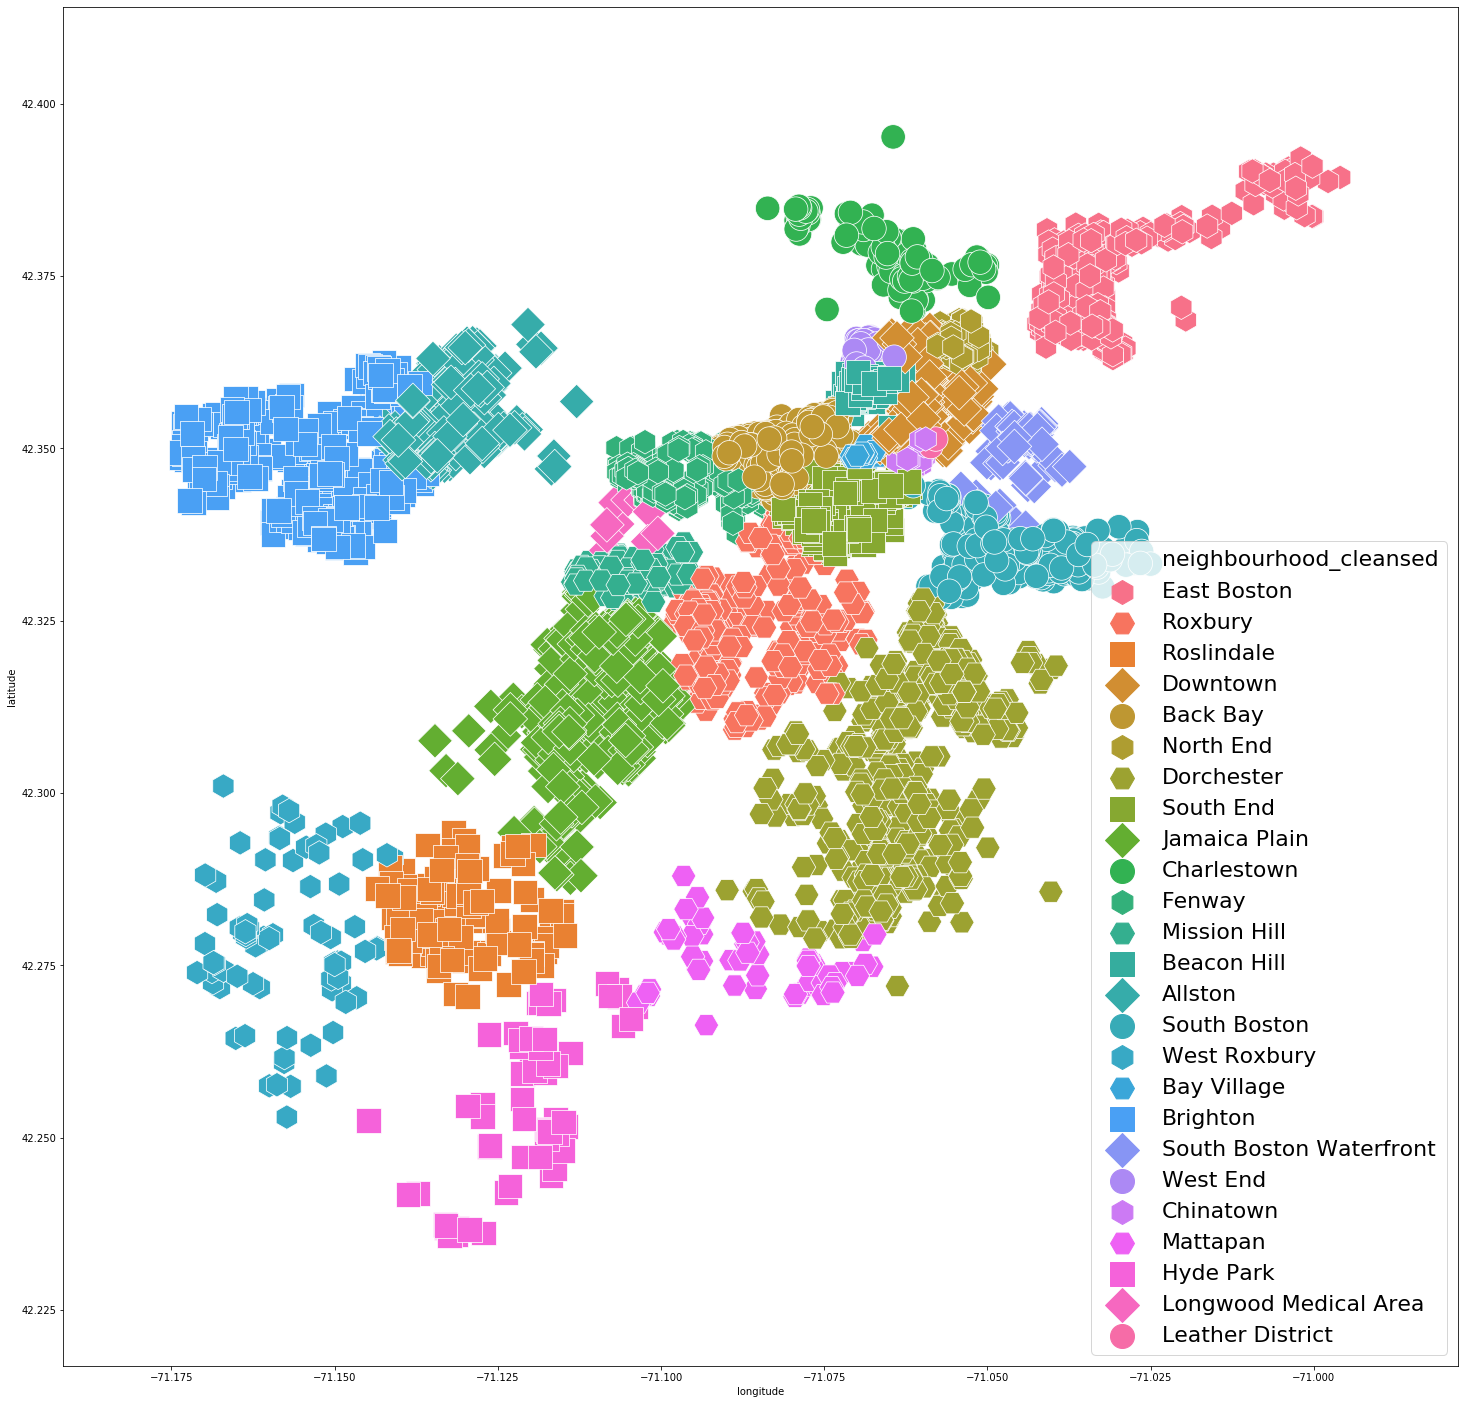

In [102]:
plt.figure(figsize=(25,25))
markers=[
    'h','H','s','D','o',
    'h','H','s','D','o',
    'h','H','s','D','o',
    'h','H','s','D','o',
    'h','H','s','D','o']

sns.scatterplot('longitude','latitude', hue='neighbourhood_cleansed',style='neighbourhood_cleansed',
                markers=markers, data = listings, s = 600)
plt.legend(markerscale=4 , fontsize=22);

neighbourhoods are hard to plot with [**Basemap**](https://matplotlib.org/basemap/index.html) as well
- the tool is best for plotting at continent and county level **not enough detial at city level**
- we need to try something else

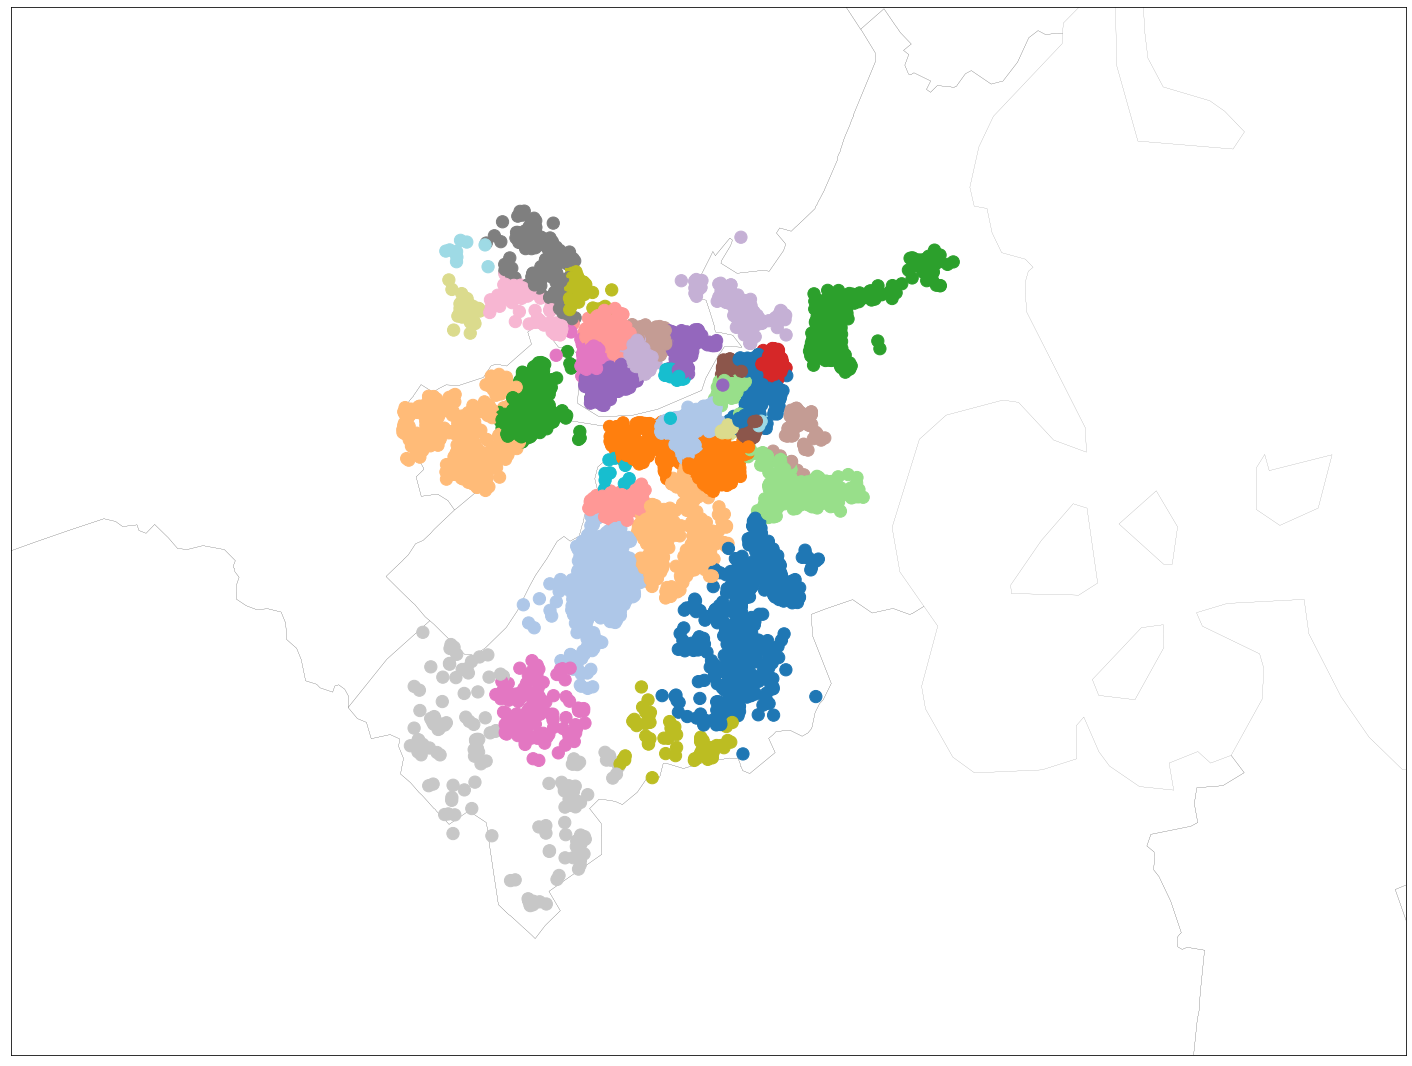

In [220]:
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(25,25))

# initialise the map & set boundaries
m = Basemap(llcrnrlat=42.20, llcrnrlon=-71.30, urcrnrlat=42.45, urcrnrlon=-70.85,projection='merc')
# Draws the US counties
m.drawcounties()

x,y = m(listings.longitude.values, listings.latitude.values)

df_c = pd.DataFrame(listings.neighbourhood_cleansed.value_counts(ascending=True))
df_c['color']=range(1,len(df_c)+1)

scat = m.scatter(x,y, s=150, c = listings.neighbourhood_cleansed.apply(lambda x: df_c.loc[x].color), cmap='tab20_r')

# # colors = {'Entire home/apt':'tab:green', 'Private room':'tab:blue', 'Shared room':'tab:red'}
# colors = {'Entire home/apt':'tab:red', 'Private room':'tab:green', 'Shared room':'c'}

# scat = m.scatter(x,y, s=12,c = listings.room_type.apply(lambda x: colors[x]), alpha=0.6)

plt.show()

### [gmaps](https://jupyter-gmaps.readthedocs.io/en/latest/) come to the rescue

- it is interactive
- it requires a Google API key, but the key is not something meant to be shared
- if you have a Google API key, use your own down below

- This is how it looks like, if the cell below doesn't run

![](../img/heatmap.png)

In [127]:
import gmaps
# Read Your Google API key from a local file
with open('../../GCP_API_Key.txt', 'r') as f:
    gmaps.configure(api_key=f.read()) 

# configure a gmaps fig
figure_layout = {'width': '1000px','height': '1000px'}
bos_center = (42.315, -71.04)
fig = gmaps.figure(layout = figure_layout, center=bos_center, zoom_level=13.25)

# load a Numpy array of (latitude, longitude) pairs, also accepts df columns
locs = list(zip(listings.latitude, listings.longitude))

fig.add_layer(gmaps.heatmap_layer(locs, gradient=[(0,0,0,0),'blue','yellow','red']))
# fig.add_layer(gmaps.heatmap_layer(locs))
fig

Figure(layout=FigureLayout(height='1000px', width='1000px'))

In [15]:
# # Exporting the map to HTML so we can screenshot the image in larger size
# from ipywidgets.embed import embed_minimal_htmlIIif
# embed_minimal_html('export.html', views=[fig])

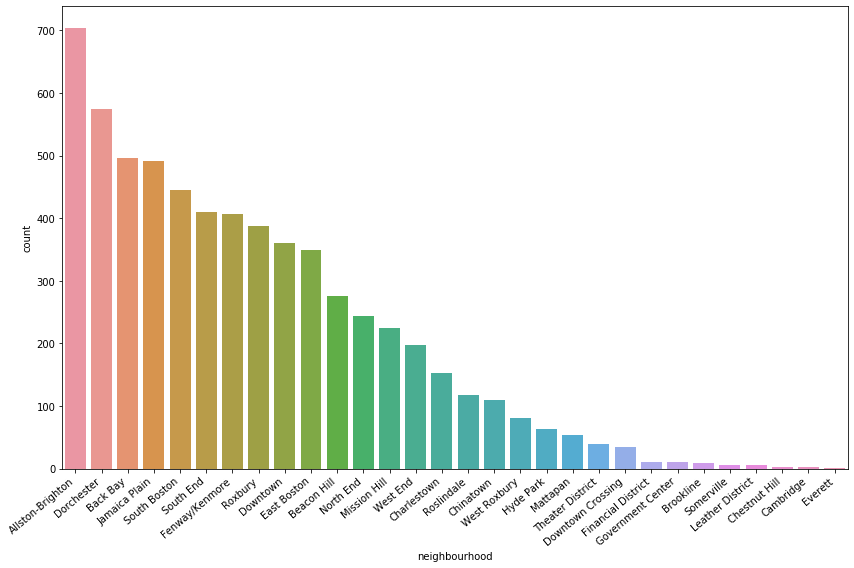

In [23]:
# listing counts by neighbourhood
plt.figure(figsize=(12,8))
ax = sns.countplot(x='neighbourhood',data=listings,
                   order=listings.neighbourhood.value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

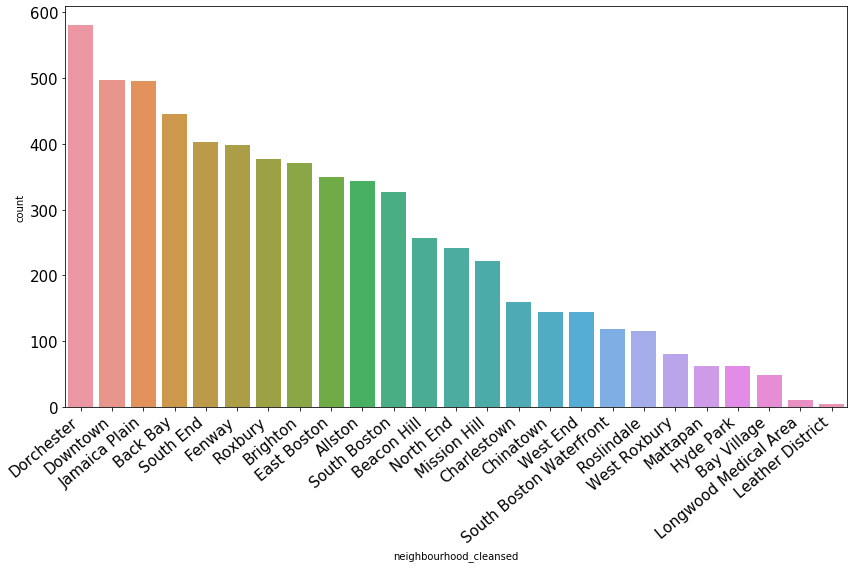

In [48]:
# listing counts by neighbourhood_cleansed
# Dorchrdter and Jamaica Plain have lots of listings but they are also very big
plt.figure(figsize=(12,8))
ax = sns.countplot(x='neighbourhood_cleansed',data=listings,
                   order=listings.neighbourhood_cleansed.value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=15)
ax.set_yticklabels([0,100,200,300,400,500,600],fontsize=15)
plt.tight_layout()
plt.show()

In [47]:
# # which neighbourhood has the most affordable avg.price
# ax = df_by_id_nb.groupby('neighbourhood').price.median().sort_values().plot.bar(figsize=(10,6))
# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

In [ ]:
listings.latitude

# TRANSPORTATION

- like other metro citys Boston's T is huge part of people's lives
- let's see how it affects Airbnd listings

![](../img/T-map3.jpg)

In [132]:
# %%time # DO NOT REMOVE!!!

# # T stations

# redline = \
# 'Alewife,Davis,Porter,Harvard,Central,Kendall/MIT,Charles/MGH,Park Street,Downtown Crossing,South Station,Broadway,\
# Andrew,JFK/UMass,North Quincy,Wollaston,Quincy Center,Quincy Adams,Braintree,Savin Hill,Fields Corner,Shawmut,Ashmont'

# orangeline = \
# 'Oak Grove,Malden Center,Wellington,Assembly,Sullivan Square,Community College,North Station,Haymarket,State,\
# Downtown Crossing,Chinatown,Tufts Medical Center,Back Bay,Mass Ave,Ruggles,Roxbury Crossing,Jackson Square,\
# Stony Brook,Green Street,Forest Hills'

# greenline = \
# 'Lechmere,Science Park,North Station,Haymarket,Government Center,Park Street,Boylston,Arlington,Copley,Prudential,\
# Symphony,Northeastern University,Museum of Fine Arts,Longwood Medical Area,Brigham Circle,Fenwood Road,Mission Park,\
# Riverway,Back of the Hill,Heath Street,Hynes Convention Center,Kenmore,Fenway,Longwood,Brookline Village,\
# Brookline Hills,Beaconsfield,Reservoir,Chestnut Hill,Newton Centre,Newton Highlands,Eliot,Waban,Woodland,Riverside,\
# Saint Marys Street,Hawes Street,Kent Street,Saint Paul Street,Coolidge Corner,Summit Avenue,Brandon Hall,\
# Fairbanks Street,Washington Square,Tappan Street,Dean Road,Englewood Avenue,Cleveland Circle,Blandford Street,\
# Boston University East,Boston University Central,Boston University West,Saint Paul Street,Pleasant Street,\
# Babcock Street,Packards Corner,Harvard Avenue,Griggs Street,Allston Street,Warren Street,Washington Street,\
# Sutherland Road,Chiswick Road,Chestnut Hill Avenue,South Street,Boston College'

# blueline = \
# 'Wonderland,Revere Beach,Beachmont,Suffolk Downs,Orient Heights,Wood Island,Airport,Maverick,Aquarium,State,\
# Government Center,Bowdoin'

# silverline = \
# 'World Trade Center,Courthouse,South Station,Airport,Eastern Avenue,Box District,Bellingham Square,Chelsea,\
# Essex St @ Atlantic Ave,Temple Pl @ Washington St,Tremont St @ Boylston Station,Tufts Medical Center,\
# Washington St @ Herald St,Washington St @ E Berkeley St,Washington St @ Union Pk,Washington St @ W Newton St,\
# Washington St @ Worcester St,Washington St @ Massachusetts Ave,Washington St @ Lenox St,\
# Washington St @ Melnea Cass Blvd,Dudley Square'

# silverline_2 = \
# 'South Station,Courthouse Station,World Trade Center,Manulife Building,Northern Ave @ Harbor St,Northern Ave @ Tide St,\
# 23 Drydock Ave,27 Drydock Ave,Drydock Ave @ Black Falcon Ave,88 Black Falcon,Drydock Ave @ Design Center Place'

# redline = redline.split(',')
# orangeline = orangeline.split(',')
# greenline = greenline.split(',')
# blueline = blueline.split(',')
# silverline_2 = silverline_2.split(',')
# t_stations = list(set(redline+orangeline+greenline+blueline+silverline_2))
# len(t_stations)

# import googlemaps

# # Read Your Google API key from a local file
# with open('../../GCP_API_Key.txt', 'r') as f:
#     googlemaps = googlemaps.Client(key=f.read())

# # Look up an address with reverse geocoding, not used in this project
# reverse_geocode_result = googlemaps.reverse_geocode((42.3926006,-71.0772502))

# t_station_geocodes = []

# for ts_name in t_stations:
#     geocode = googlemaps.geocode(ts_name+', MBTA')
#     t_station_geocodes.append((ts_name,geocode[0]['geometry']['location']['lat'],\
#                                geocode[0]['geometry']['location']['lng']) if geocode else (ts_name,np.nan,np.nan))

    
# df_t_stations= pd.DataFrame(t_station_geocodes, columns=['station','lat','lng'])
# df_t_stations['r'] = df_t_stations.station.apply(lambda x : 1 if x in redline else 0)
# df_t_stations['o'] = df_t_stations.station.apply(lambda x : 1 if x in orangeline else 0)
# df_t_stations['g'] = df_t_stations.station.apply(lambda x : 1 if x in greenline else 0)
# df_t_stations['b'] = df_t_stations.station.apply(lambda x : 1 if x in blueline else 0)
# df_t_stations['s2'] = df_t_stations.station.apply(lambda x : 1 if x in silverline_2 else 0)

# with open ('../input/df_t_stations.pickle','wb') as fp:
#     pickle.dump(df_t_station_geocode,fp,pickle.HIGHEST_PROTOCOL)

with open('../input/dataframe/df_t_stations.pickle', 'rb') as f:
    df_t_stations = pickle.load(f)

In [133]:
df_t_stations.isna().mean()

station    0.0
lat        0.0
lng        0.0
r          0.0
o          0.0
g          0.0
b          0.0
s2         0.0
dtype: float64

In [134]:
df_t_stations[df_t_stations.r+df_t_stations.o+df_t_stations.g+df_t_stations.b+df_t_stations.s2>1]

,station,lat,lng,r,o,g,b,s2
18,State,42.357492,-71.057438,0,1,0,1,0
25,Park Street,42.356334,-71.062365,1,0,1,0,0
38,Downtown Crossing,42.355453,-71.060453,1,1,0,0,0
40,Government Center,42.359738,-71.059395,0,0,1,1,0
112,North Station,42.366352,-71.062150,0,1,1,0,0
116,South Station,42.351881,-71.055096,1,0,0,0,1
117,Haymarket,42.362849,-71.058273,0,1,1,0,0


In [140]:
# Some of the same listings recorded slitly different geocodes over 12 month
# Therefore need to unify the geocodes using the median, this is for calculating/assigning a t_station to the listing
df_by_id = price_bos_12m.groupby(['id']).median().reset_index()
df_by_id.head()

,id,latitude,longitude,price
0,3781,42.365241,-71.029361,125.0
1,5506,42.329809,-71.095595,145.0
2,6695,42.329941,-71.093505,169.0
3,6976,42.292438,-71.135765,65.0
4,8789,42.359187,-71.062651,99.0


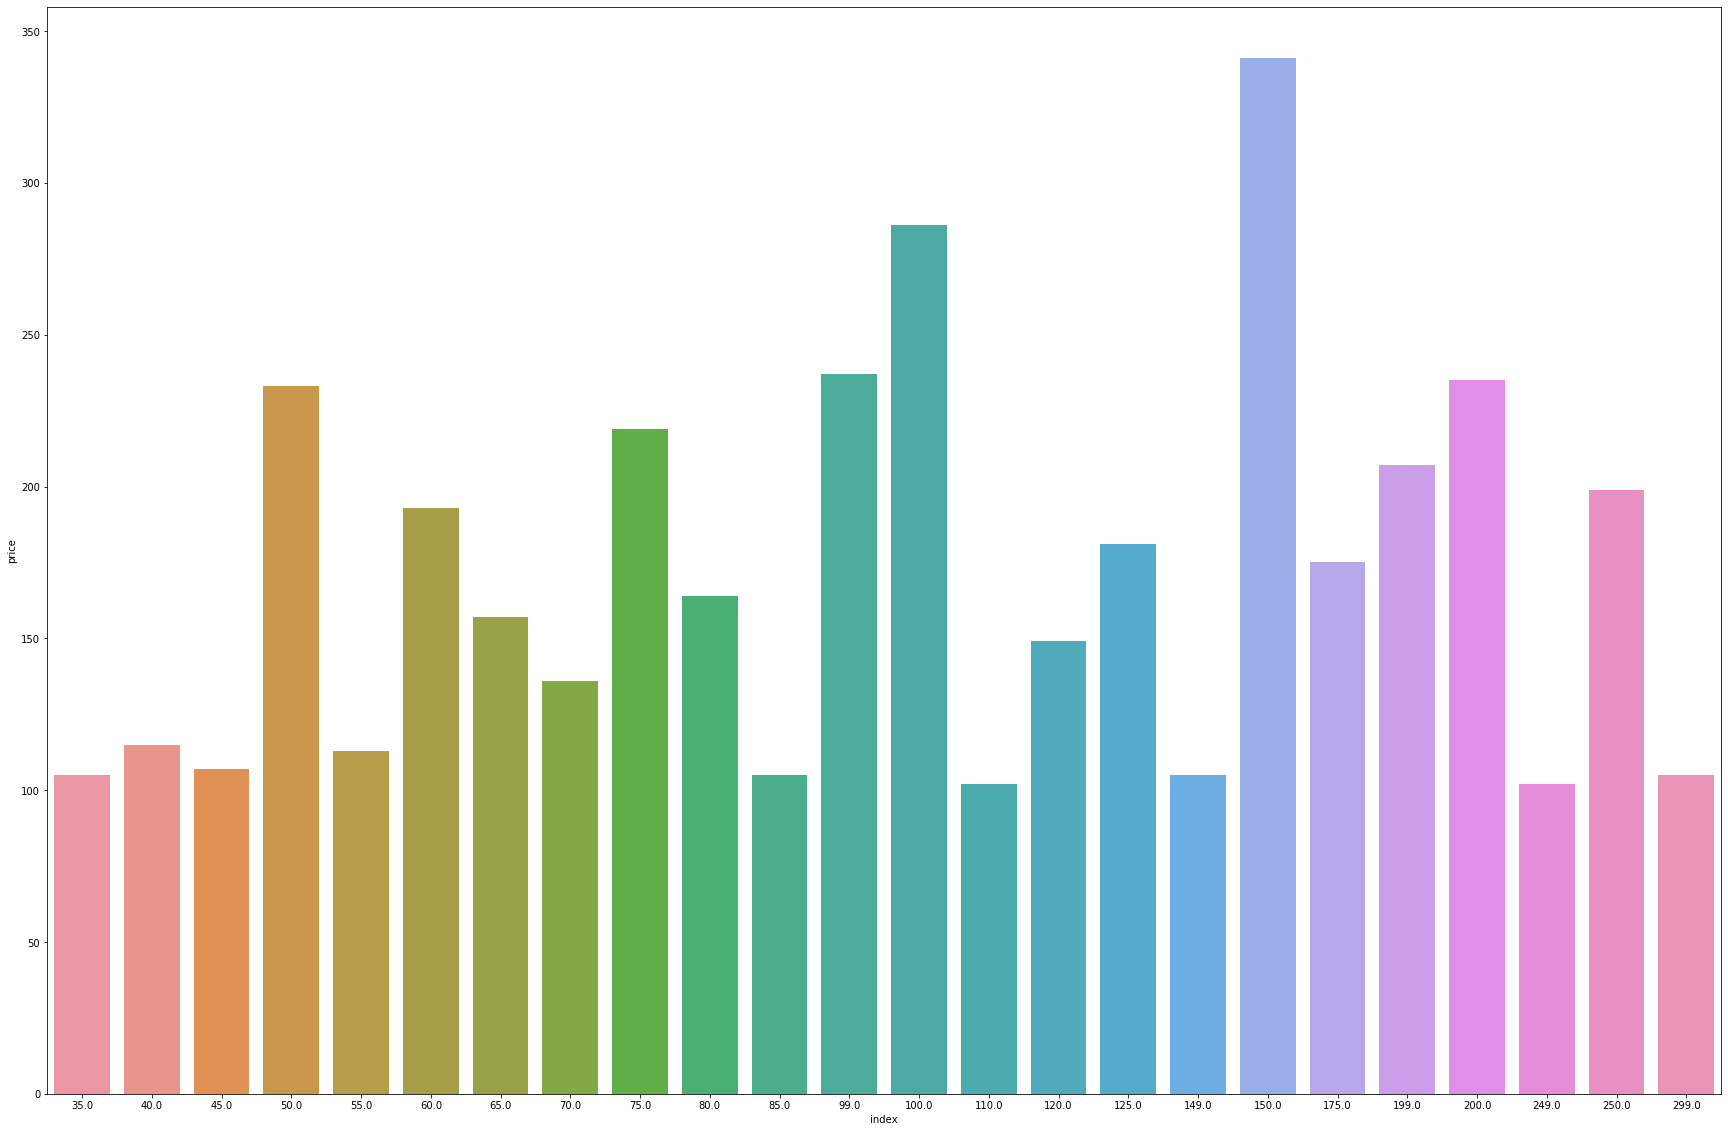

In [171]:
# p_d = pd.DataFrame(df_by_id.price.value_counts().sort_index().reset_index())
# p_d.rename(columns={"index": "price", "price": "counts"})
# plt.figure(figsize=(30,20))
# sns.barplot('index','price', data = p_d[p_d.price>100])

In [169]:
p_d.head()

,index,price
0,0.0,7
1,10.0,9
2,15.0,1
3,18.0,1
4,19.0,1


In [141]:
# Some of the same listings recorded slitly different geocodes over 12 month
# resulting 58 listings have variance in neighbourhood
# df_by_id.shape[0], df_by_id_nb.shape[0],df_by_id_nb[df_by_id_nb.duplicated('id',False)].shape[0]/2
# Therefore need to unify the geocodes using the median, this is for calculating/assigning a t_station to the listing
df_by_id_nb = price_bos_12m.groupby(['id','neighbourhood']).median().reset_index()
df_by_id_nb.head()

,id,neighbourhood,latitude,longitude,price
0,3781,East Boston,42.365241,-71.029361,125.0
1,5506,Roxbury,42.329809,-71.095595,145.0
2,6695,Roxbury,42.329941,-71.093505,169.0
3,6976,Roslindale,42.292438,-71.135765,65.0
4,8789,Downtown,42.359187,-71.062651,99.0


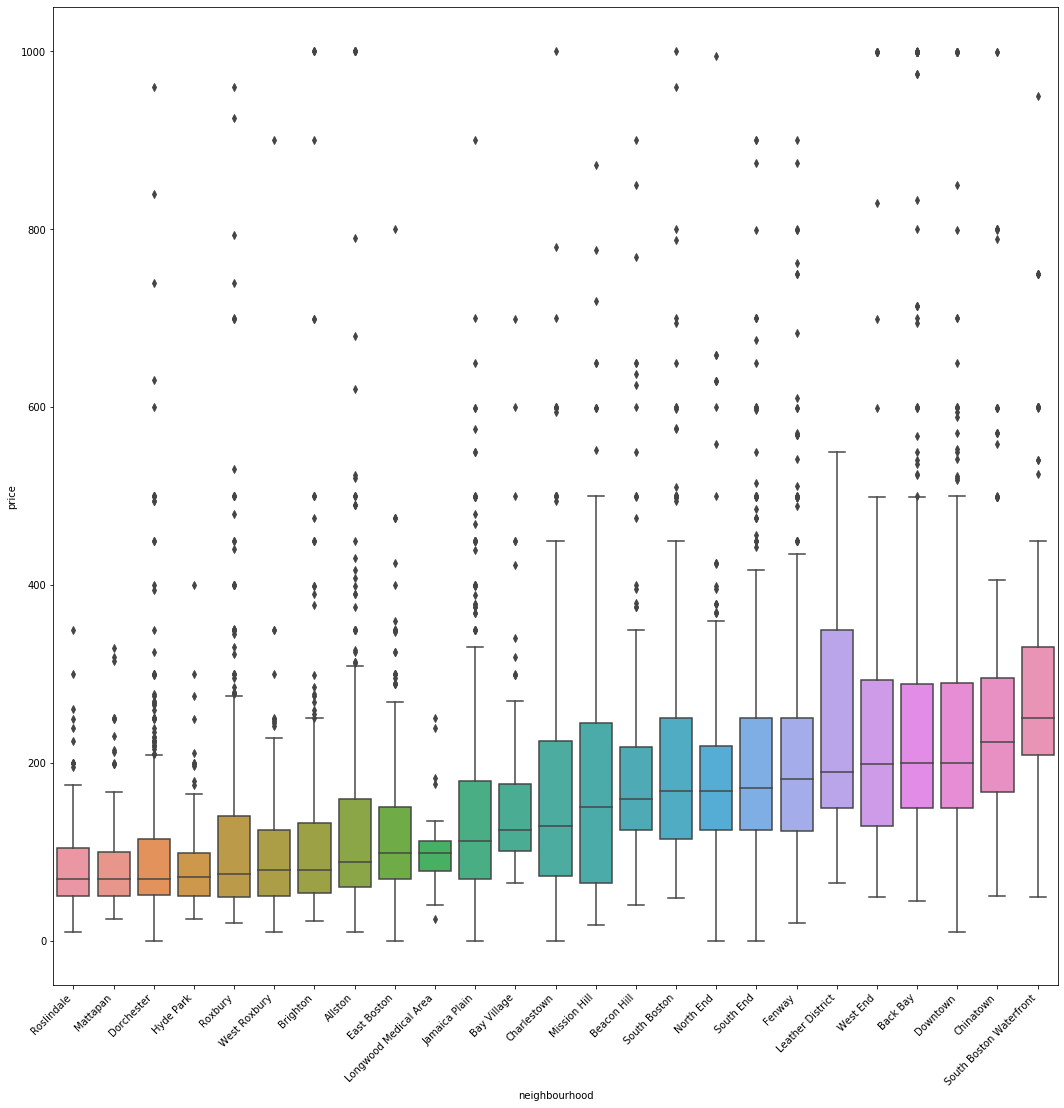

In [210]:
plt.figure(figsize=(18,18))
df = df_by_id_nb[df_by_id_nb.price<=1000]
ax = sns.boxplot(x='neighbourhood', y='price', data= df,orient='v',
                order=df.groupby('neighbourhood').median().price.sort_values().index);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right");

In [142]:
# 58 listings have different geocode and variance in neighbourhood
df_by_id_nb[df_by_id_nb.duplicated('id',False)]

,id,neighbourhood,latitude,longitude,price
169,611081,Charlestown,42.376690,-71.050310,325.0
170,611081,East Boston,42.381670,-71.039918,325.0
1412,8827268,South Boston Waterfront,42.349555,-71.049412,174.0
1413,8827268,South End,42.344302,-71.068997,174.0
2409,14586440,Beacon Hill,42.358370,-71.063130,179.0
2410,14586440,Downtown,42.353231,-71.063822,179.0
2448,14760955,Beacon Hill,42.357140,-71.068589,143.0
2449,14760955,Downtown,42.358940,-71.061640,143.0
3027,17144128,Downtown,42.362678,-71.063681,1143.0
3028,17144128,West End,42.362780,-71.063870,1171.0


In [143]:
# calculating and assigning a t_station to the listing

"""
# 1 degree of latitude ~= 69 miles (111 km), regardless of the longitude
# 1 degree of longitude ~= 69 miles (111 km) at the Equator where latitude = 0, but this varies by latitude
# Per latitude:
# Latitude +10 or -10, 1 degree of longitude = 68 miles (109km)
# Latitude +20 or -20, 1 degree of longitude = 65 miles (104km)
# Latitude +30 or -30, 1 degree of longitude = 60 miles (96km)
# Latitude +40 or -40, 1 degree of longitude = 53 miles (85km)
# Latitude +50 or -50, 1 degree of longitude = 44 miles (71km)
# Latitude +60 or -60, 1 degree of longitude = 35 miles (56km)
# Latitude +70 or -70, 1 degree of longitude = 24 miles (38km)
# Latitude +80 or -80, 1 degree of longitude = 12 miles (19km)
# Latitude +90 or -90, 1 degree of longitude = 0 miles/km
"""
df_arrg = pd.DataFrame()

for index, row in df_t_stations.iterrows():
    df_arrg[row.station] = abs(df_by_id.latitude-row.lat)*69+abs(df_by_id.longitude-row.lng)*50

df_by_id['t_station'] = df_t_stations.station[np.argmin(df_arrg.values,axis=1)].values
df_by_id['t_station_dis'] = np.min(df_arrg.values,axis=1)
df_by_id['redline'] = df_t_stations.r[np.argmin(df_arrg.values,axis=1)].values
df_by_id['orangeline'] = df_t_stations.o[np.argmin(df_arrg.values,axis=1)].values
df_by_id['blueline'] = df_t_stations.b[np.argmin(df_arrg.values,axis=1)].values
df_by_id['greenline'] = df_t_stations.g[np.argmin(df_arrg.values,axis=1)].values
df_by_id['silverline_2'] = df_t_stations.s2[np.argmin(df_arrg.values,axis=1)].values

df_arrg = pd.DataFrame()

for index, row in df_t_stations.iterrows():
    df_arrg[row.station] = abs(df_by_id_nb.latitude-row.lat)*69+abs(df_by_id_nb.longitude-row.lng)*50

df_by_id_nb['t_station'] = df_t_stations.station[np.argmin(df_arrg.values,axis=1)].values
df_by_id_nb['t_station_dis'] = np.min(df_arrg.values,axis=1)

In [144]:
df_by_id.head()

,id,latitude,longitude,price,t_station,t_station_dis,redline,orangeline,blueline,greenline,silverline_2
0,3781,42.365241,-71.029361,125.0,Airport,0.670847,0,0,1,0,0
1,5506,42.329809,-71.095595,145.0,Roxbury Crossing,0.110494,0,1,0,0,0
2,6695,42.329941,-71.093505,169.0,Roxbury Crossing,0.196299,0,1,0,0,0
3,6976,42.292438,-71.135765,65.0,Forest Hills,1.737123,0,1,0,0,0
4,8789,42.359187,-71.062651,99.0,Bowdoin,0.180993,0,0,1,0,0


In [145]:
df_by_id_nb.head()

,id,neighbourhood,latitude,longitude,price,t_station,t_station_dis
0,3781,East Boston,42.365241,-71.029361,125.0,Airport,0.670847
1,5506,Roxbury,42.329809,-71.095595,145.0,Roxbury Crossing,0.110494
2,6695,Roxbury,42.329941,-71.093505,169.0,Roxbury Crossing,0.196299
3,6976,Roslindale,42.292438,-71.135765,65.0,Forest Hills,1.737123
4,8789,Downtown,42.359187,-71.062651,99.0,Bowdoin,0.180993


In [146]:
df_by_id[['latitude','longitude','price','t_station_dis']].describe()

,latitude,longitude,price,t_station_dis
count,9967.000000,9967.000000,9967.000000,9967.000000
mean,42.340202,-71.084735,188.248972,0.475248
std,0.025666,0.033209,308.345353,0.631540
min,42.235760,-71.185310,0.000000,0.001088
25%,42.328896,-71.106121,78.000000,0.163061
50%,42.345757,-71.078180,140.000000,0.286602
75%,42.355369,-71.061603,221.000000,0.529799
max,42.400056,-70.983340,10000.000000,6.055311


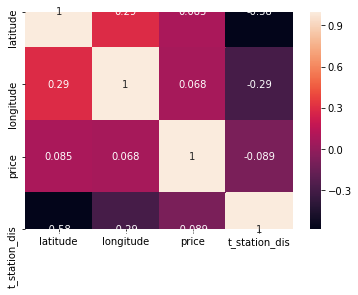

In [147]:
sns.heatmap(df_by_id[['latitude','longitude','price','t_station_dis']].corr(),annot=True);

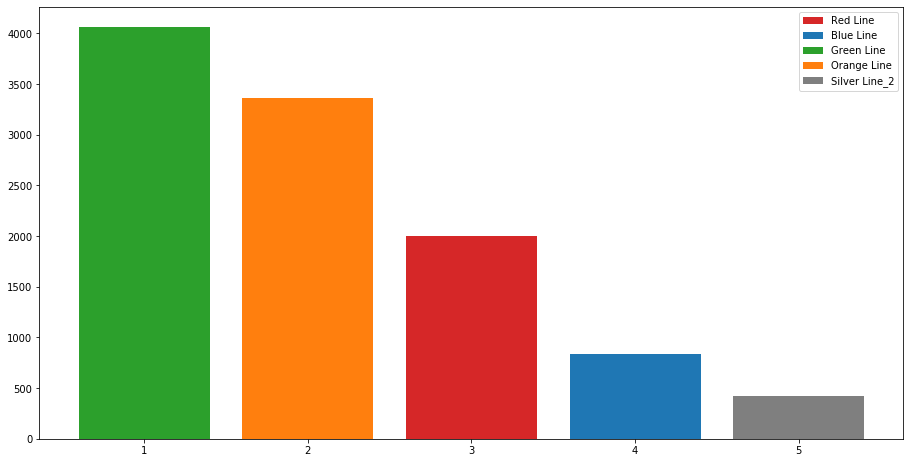

In [59]:
# potentially most traveled subway line by Airbnb guests
fig = plt.figure(figsize=(12,6))
axes = fig.add_axes([0,0,1,1])
axes.bar(3, df_by_id.redline.sum(), label='Red Line',color='tab:red')
axes.bar(4, df_by_id.blueline.sum(), label='Blue Line',color='tab:blue')
axes.bar(1, df_by_id.greenline.sum(), label='Green Line',color='tab:green')
axes.bar(2, df_by_id.orangeline.sum(), label='Orange Line',color='tab:orange')
axes.bar(5, df_by_id.silverline_2.sum(), label='Silver Line_2',color='tab:gray')
axes.legend();

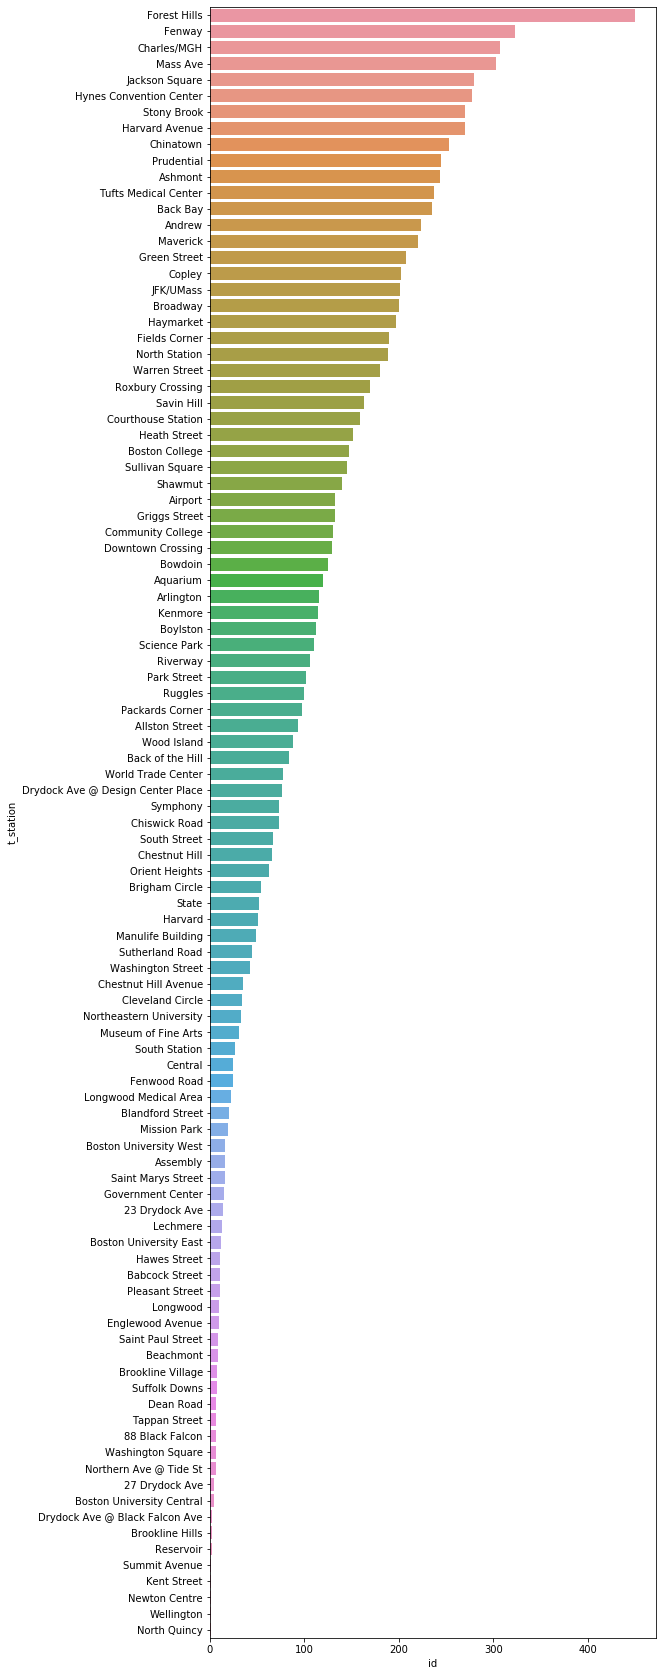

In [60]:
# potentially most traveled t_station by Airbnb guests
df_station = df_by_id.groupby('t_station').id.count().reset_index().sort_values('id',ascending=False)
plt.figure(figsize=(8,30))
sns.barplot(x='id', y='t_station', data=df_station);

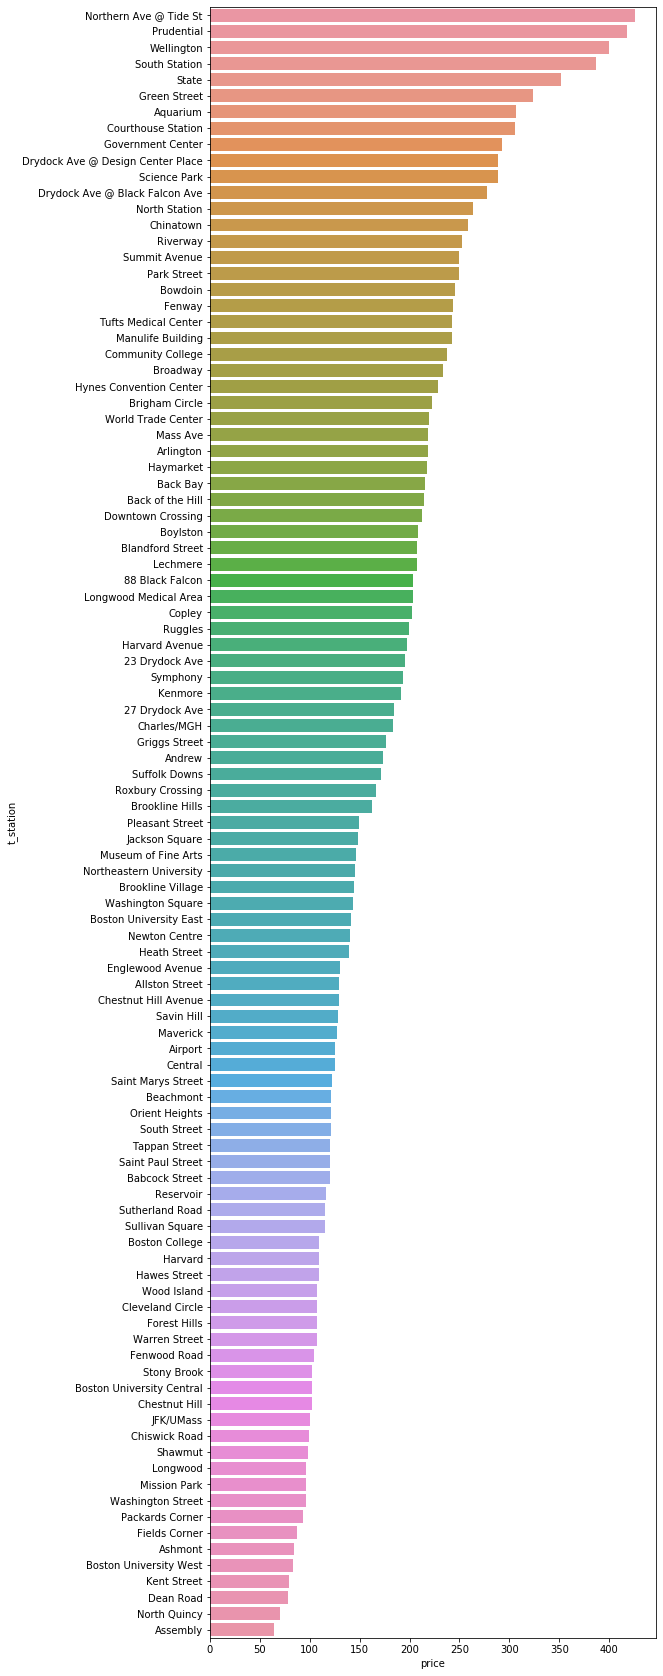

In [61]:
# Avg. price by t_station
df_station= df_by_id.groupby('t_station').price.mean().reset_index().sort_values('price',ascending=False)
plt.figure(figsize=(8,30))
sns.barplot(x='price', y='t_station', data=df_station);

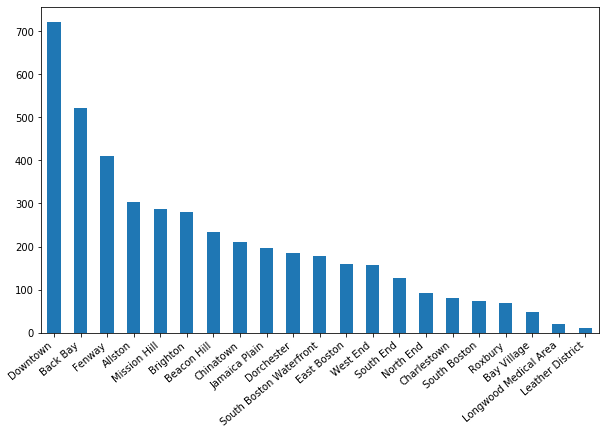

In [62]:
# which neighbourhood has the most listings that are within quarter mile of a t-station
ax = df_by_id_nb[df_by_id_nb.t_station_dis<0.25].neighbourhood.value_counts().plot.bar(figsize=(10,6));
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

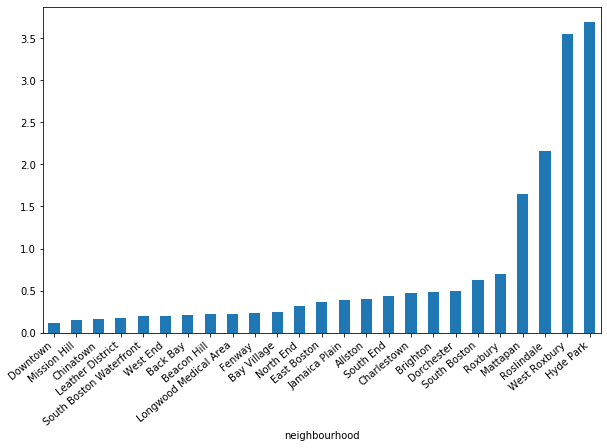

In [63]:
# which neighbourhood listings have the shortest avg. distance to a nearby station
ax = df_by_id_nb.groupby('neighbourhood').t_station_dis.mean().sort_values().plot.bar(figsize=(10,6))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

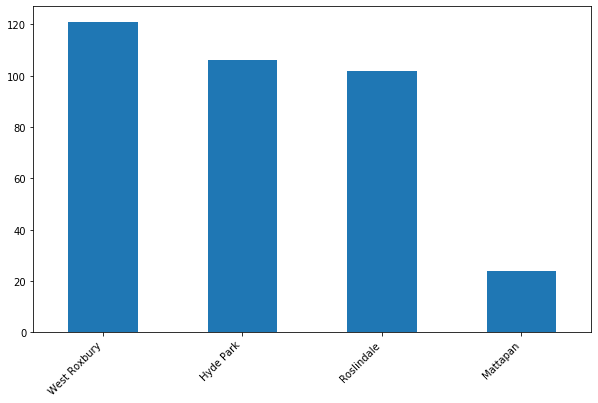

In [64]:
# which neighbourhood has the most listings that are farthur than 2 miles away from a t-station
ax= df_by_id_nb[df_by_id_nb.t_station_dis>2].neighbourhood.value_counts().plot.bar(figsize=(10,6));
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right");

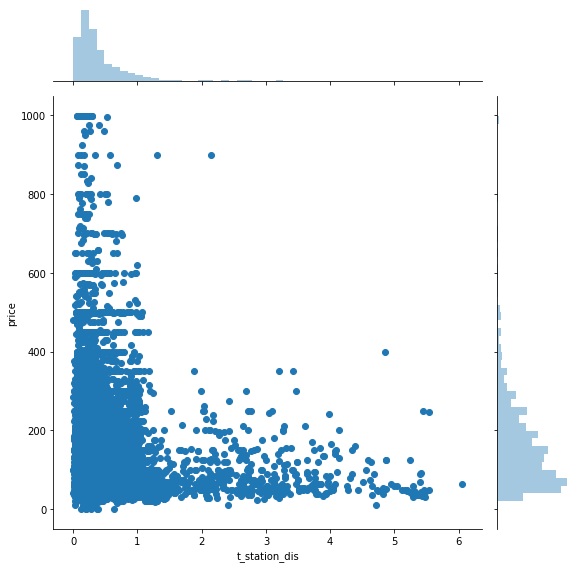

In [65]:
# price and distance to nearby t_station
# distance to a nearby t_station further than 1 mile tend to have lower price
# pricing is more clustered as you go higher in the range
sns.jointplot(y='price', x='t_station_dis',data=df_by_id[df_by_id['price'] < 1000],kind='scatter',height=8);

# SPACE

### room_type

![room_type.png](../img/room_type.png)

![room_type_map.png](../img/room_type_map.png)

In [66]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

In [67]:
import plotly.graph_objs as go

rt_count = listings.room_type.value_counts()

fig = go.Figure(data=[go.Pie(labels=rt_count.index, values=rt_count.values, hole=.3)])
fig.show()

In [68]:
# fig = gmaps.figure(layout = figure_layout, center=bos_center, zoom_level=12.25)

# # We can add layers of markers to a Google map using function .symbol_layer()
# # Each marker represents an individual data point
# # Google maps may become very slow if you try to represent more than a few thousand symbols or markers
# Entire_layer = gmaps.symbol_layer(listings[listings.room_type=='Entire home/apt'][['latitude', 'longitude']][:100],
#                                   fill_color='red',
#                                   stroke_color='red',
#                                   fill_opacity=.5,
#                                   stroke_opacity=.5,
#                                   scale=2)

# Private_layer = gmaps.symbol_layer(listings[listings.room_type=='Private room'][['latitude', 'longitude']][:100],
#                                   fill_color='green',
#                                   stroke_color='green',
#                                   fill_opacity=.5,
#                                   stroke_opacity=.5,
#                                   scale=2)

# Shared_layer = gmaps.symbol_layer(listings[listings.room_type=='Shared room'][['latitude', 'longitude']],
#                                   fill_color='#00ffff',
#                                   stroke_color='#00ffff',
#                                   fill_opacity=.5,
#                                   stroke_opacity=.5,
#                                   scale=2)

# # add several layers of markers
# fig.add_layer(Entire_layer)
# fig.add_layer(Private_layer)
# fig.add_layer(Shared_layer)
# fig

### property_type

![property_type.png](../img/property_type.png)

In [69]:
rt_count = listings.property_type.value_counts()

fig = go.Figure(data=[go.Pie(labels=rt_count.index, values=rt_count.values)])

fig.show()

In [70]:
# Avg square_feet?
listings.square_feet.mean(),listings_filtered.square_feet.mean()

(752.5923076923077, 775.8648648648649)

In [71]:
# Avg bedrooms
listings.bedrooms.mean(),listings_filtered.bedrooms.mean()

(1.34238262535931, 1.3872665088134701)

In [72]:
# Avg beds
listings.beds.mean(),listings_filtered.beds.mean()

(1.8196040868454662, 1.8932140978432404)

In [73]:
# Avg bathrooms
listings.bathrooms.mean(),listings_filtered.bathrooms.mean()

(1.2586647500399297, 1.273157894736842)

# OTHER_DETAILS

### cancellation_policy

![cancellation_policy.png](../img/cancellation_policy.png)

In [74]:
cp_count = listings.cancellation_policy.value_counts()

fig = go.Figure(data=[go.Pie(labels=cp_count.index, values=cp_count.values, hole=.5)])
fig.show()

### security_deposit

In [75]:
listings.security_deposit = listings.security_deposit.apply(clean_price)
listings.security_deposit.describe()

count    4526.000000
mean      205.656430
std       356.962309
min         0.000000
25%         0.000000
50%       100.000000
75%       300.000000
max      5000.000000
Name: security_deposit, dtype: float64

In [76]:
# percentage of listings which do not require security deposit
listings[listings.security_deposit==0].shape[0] / listings.shape[0]

0.3055555555555556

### cleaning_fee

In [77]:
listings.cleaning_fee = listings.cleaning_fee.apply(clean_price)
listings.cleaning_fee.describe()

count    5298.000000
mean       72.107965
std        49.956565
min         0.000000
25%        30.000000
50%        69.000000
75%       100.000000
max       495.000000
Name: cleaning_fee, dtype: float64

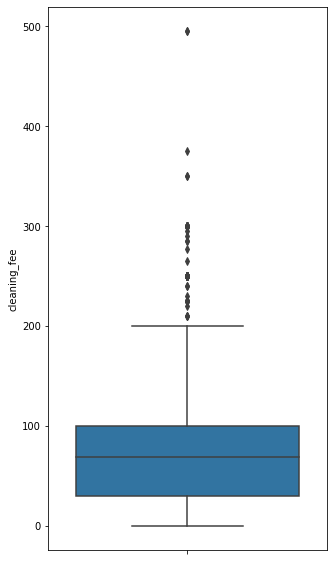

In [78]:
plt.figure(figsize=(5,10))
sns.boxplot(y='cleaning_fee',data=listings);

In [79]:
listings.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,security_deposit,cleaning_fee,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,6.264000e+03,6.264000e+03,0.0,0.0,0.0,6.264000e+03,0.0,6259.000000,6259.000000,0.0,6264.000000,6264.000000,6264.000000,6261.000000,6262.000000,6264.000000,130.000000,6264.000000,4526.000000,5298.000000,6264.000000,6264.000000,6.264000e+03,6264.000000,6264.000000,6.264000e+03,6.264000e+03,6264.000000,6.264000e+03,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,5033.000000,5030.000000,5032.000000,5028.000000,5033.000000,5028.000000,5028.000000,6264.000000,6264.000000,6264.000000,6264.000000,5089.000000
mean,2.084897e+07,2.019071e+13,NaN,NaN,NaN,6.942469e+07,NaN,135.717047,135.717047,NaN,42.339222,-71.083164,3.388889,1.258665,1.342383,1.819604,752.592308,199.063697,205.656430,72.107965,1.715198,5.666826,1.673221e+04,5.601692,8.634259,1.668794e+04,1.669690e+04,7.201469,1.669611e+04,8.062739,20.241539,32.939336,128.852490,36.060026,15.423691,93.028611,9.584692,9.428060,9.730310,9.669581,9.580748,9.263126,32.583014,30.160600,2.321041,0.101373,2.060120
std,9.885939e+06,2.859603e+00,NaN,NaN,NaN,7.472804e+07,NaN,319.727516,319.727516,NaN,0.025850,0.033058,2.258649,0.501649,0.952969,1.382017,470.077244,347.696661,356.962309,49.956565,1.402076,20.929425,1.263487e+06,24.319764,48.936343,1.263488e+06,1.263488e+06,31.351632,1.263488e+06,9.483048,19.934835,31.093522,131.410389,61.257676,22.788104,8.607613,0.852333,0.937519,0.736161,0.816600,0.744213,0.943277,66.082130,66.591784,5.298308,0.984522,2.132765
min,3.781000e+03,2.019071e+13,NaN,NaN,NaN,4.804000e+03,NaN,0.000000,0.000000,NaN,42.235760,-71.173510,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.378730e+07,2.019071e+13,NaN,NaN,NaN,1.224305e+07,NaN,1.000000,1.000000,NaN,42.326407,-71.103855,2.000000,1.000000,1.000000,1.000000,476.250000,80.000000,0.000000,30.000000,1.000000,1.000000,9.000000e+01,1.000000,1.000000,6.000000e+01,9.000000e+01,1.000000,9.000000e+01,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,90.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.410000
50%,2.172642e+07,2.019071e+13,NaN,NaN,NaN,3.405951e+07,NaN,4.000000,4.000000,NaN,42.345085,-71.075625,3.000000,1.000000,1.000000,1.000000,580.000000,149.000000,100.000000,69.000000,1.000000,2.000000,1.125000e+03,2.000000,2.000000,1.125000e+03,1.125000e+03,2.000000,1.125000e+03,4.000000,15.000000,27.000000,80.000000,10.000000,5.000000,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,4.000000,1.000000,0.000000,0.000000,1.300000
75%,2.903044e+07,2.019071e+13,NaN,NaN,NaN,1.074037e+08,NaN,33.000000,33.000000,NaN,42.355463,-71.061117,4.000000,1.500000,2.000000,2.000000,1000.000000,235.000000,300.000000,100.000000,2.000000,3.000000,1.125000e+03,3.000000,3.000000,1.125000e+03,1.125000e+03,3.000000,1.125000e+03,13.000000,36.000000,60.000000,258.000000,43.000000,22.0

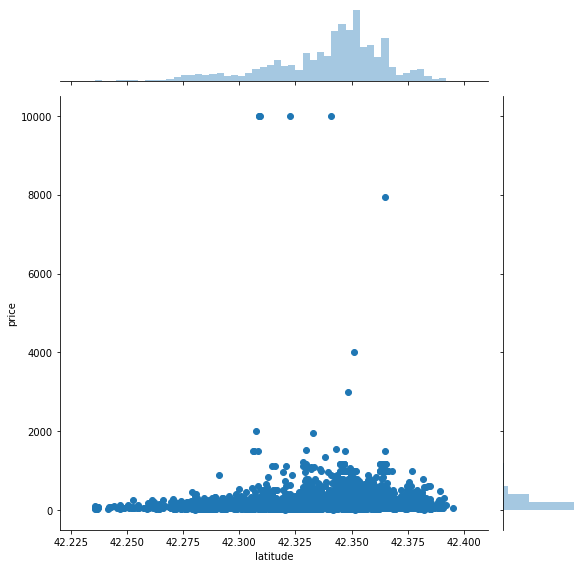

In [80]:
sns.jointplot(y='price', x='latitude',data=listings,kind='scatter',height=8);

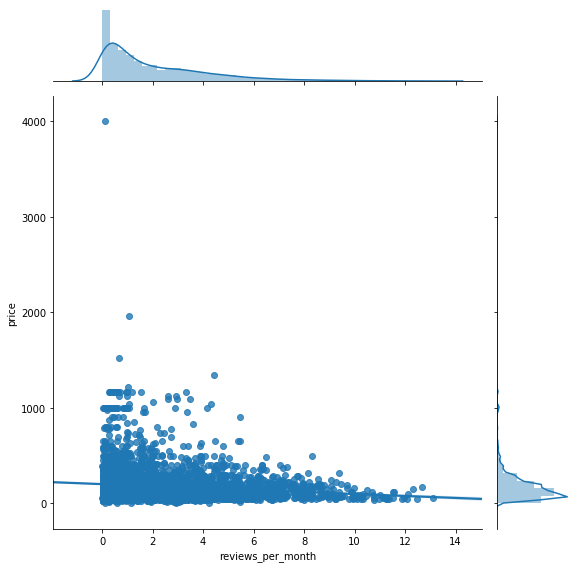

In [81]:
sns.jointplot(y='price', x='reviews_per_month',data=listings,kind='reg',height=8);

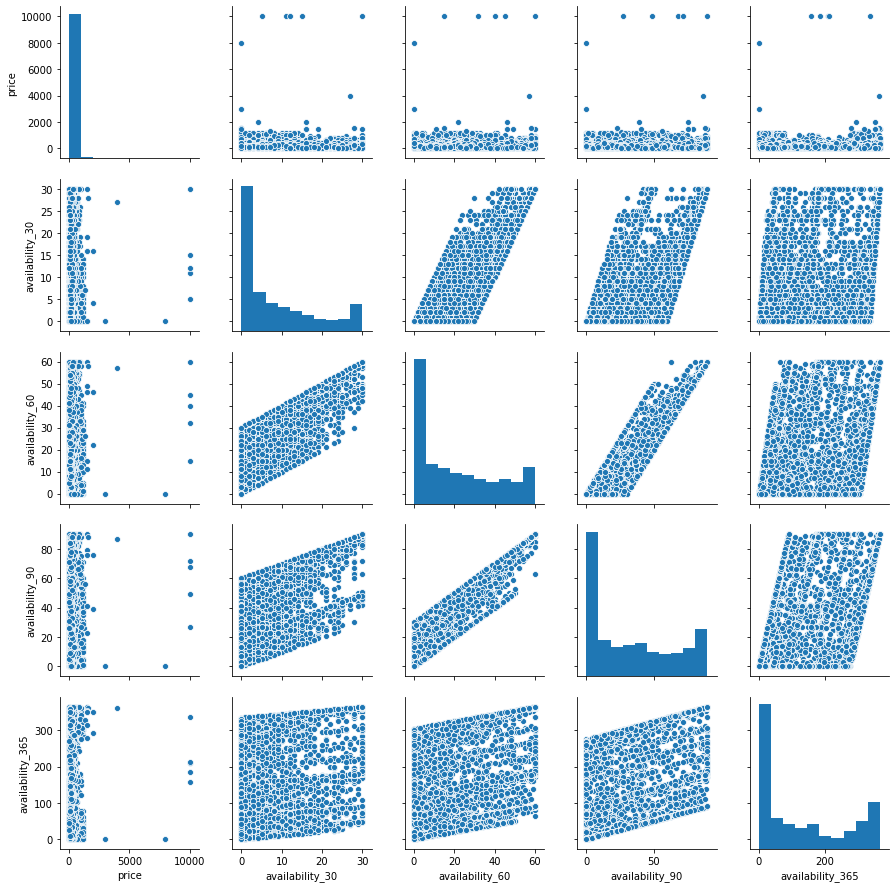

In [82]:
sns.pairplot(listings[['price','availability_30','availability_60','availability_90','availability_365']])

In [83]:
# df = pd.DataFrame(data=[['male','blue'],['male','black'],['female','black'],
#                         ['female',np.nan],[np.nan,'black']],
#                   columns=['gender','eyes'])
# df_dummies = pd.get_dummies(df,drop_first=False)
# df_dummies

# df_dummies = pd.get_dummies(df,drop_first=True)
# df_dummies

In [84]:
# df_dummies = pd.get_dummies(df,drop_first=True)
# df_dummies

### Colormaps

In [85]:
"""
Accent, Accent_r, 
Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, 
CMRmap, CMRmap_r, 
Dark2, Dark2_r, 
GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, 
OrRd, OrRd_r, Oranges, Oranges_r, 
PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, 
PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, 
RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, 
Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, 
Wistia, Wistia_r, 
YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, 
afmhot, afmhot_r, autumn, autumn_r, 
binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, 
cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, 
flag, flag_r, 
gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, 
gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, 
gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, 
hot, hot_r, hsv, hsv_r, 
icefire, icefire_r, inferno, inferno_r, 
jet, jet_r, 
magma, magma_r, mako, mako_r, 
nipy_spectral, nipy_spectral_r, 
ocean, ocean_r, 
pink, pink_r, plasma, plasma_r, prism, prism_r, 
rainbow, rainbow_r, rocket, rocket_r, 
seismic, seismic_r, spring, spring_r, summer, summer_r, 
tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, 
terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, 
viridis, viridis_r, vlag, vlag_r, 
winter, winter_r
"""

'\nAccent, Accent_r, \nBlues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, \nCMRmap, CMRmap_r, \nDark2, Dark2_r, \nGnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, \nOrRd, OrRd_r, Oranges, Oranges_r, \nPRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, \nPiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, \nRdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, \nSet1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, \nWistia, Wistia_r, \nYlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, \nafmhot, afmhot_r, autumn, autumn_r, \nbinary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, \ncividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, \nflag, flag_r, \ngist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, \ngist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_